# Libraries 

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, LinearRegression,RidgeCV,LassoCV, ElasticNetCV
sns.set()
#! pip install zipcodes
#import zipcodes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import pickle
kf = KFold(n_splits=5, shuffle=False).split(range(25))

In [74]:
xls = pd.ExcelFile('NASSAgcensusDownload2017.xlsx')


In [75]:
County_Names= pd.read_excel(xls, 'County Names')
Crops_and_Plants=pd.read_excel(xls, 'Crops and Plants').sort_values(by='FIPS')
Farms=pd.read_excel(xls, 'Farms').sort_values(by='FIPS')
Livestock_and_Animals=pd.read_excel(xls, 'Livestock and Animals').sort_values(by='FIPS')
Producers=pd.read_excel(xls, 'Producers').sort_values(by='FIPS')
Variable_Lookup=pd.read_excel(xls, 'Variable Lookup')
Economics=pd.read_excel(xls, 'Economics')

In [ ]:
County_Names

In [100]:
County_Names['Region'].unique()

array([2, 0, 1, 3])

In [99]:
countries_dict = {
    'Washington' : 0,
    'Oregon' : 0,
    'California' : 0,
    'Nevada' : 0,
    'Idaho' : 0,
    'Utah' : 0,
    'Arizona' : 0,
    'New Mexico' : 0,
    'Montana' : 0,
    'Wyoming' : 0,
    'Alaska' : 0,
    'Hawaii' : 0,
    'Texas' : 1,
    'Oklahoma' : 1,
    'Kansas' : 1,
    'Colorado' : 1,
    'Nebraska' : 1,
    'South Dakota' : 1,
    'North Dakota' : 1,
    'Minnesota' : 1,
    'Iowa' : 1,
    'Missouri' : 1,
    'Illinois' : 1,
    'Wisconsin' : 1,
    'Arkansas' : 2,
    'Louisiana' : 2,
    'Louisana' : 2,
    'Mississippi' : 2,
    'Alabama' : 2,
    'Tennessee' : 2,
    'Florida' : 2,
    'Georgia' : 2,
    'South Carolina' : 2,
    'North Carolina' : 2,
    'Kentucky' : 2,
    'Indiana' : 2,
    'Ohio' : 2,
    'Michigan' : 2,
    'Maine' : 3,
    'Vermont' : 3,
    'New Hampshire' : 3,
    'Massachusetts' : 3,
    'New York' : 3,
    'Rhode Island' : 3,
    'Connecticut' : 3,
    'New Jersey' : 3,
    'Pennsylvania' : 3,
    'Delaware' : 3,
    'Maryland' : 3,
    'West Virginia' : 3,
    'Virginia' : 3
}
County_Names['Region'] = County_Names['StateName'].replace(countries_dict)

In [7]:
Economics.head(2)

,FIPS,FIPSTEXT,y17_M011_valueText,y17_M011_classRange,y17_M011_valueNumeric,y17_M012_valueText,y17_M012_classRange,y17_M012_valueNumeric,y17_M013_valueText,y17_M013_classRange,...,y17_M073_valueNumeric,y17_M074_valueText,y17_M074_classRange,y17_M074_valueNumeric,y17_M075_valueText,y17_M075_classRange,y17_M075_valueNumeric,y17_M202_valueText,y17_M202_classRange,y17_M202_valueNumeric
0,0,0,58.03,NaN,58.03,30.49,NaN,30.49,11.48,NaN,...,133363.0,79,NaN,79.0,661,NaN,661.0,400603,NaN,400603.0
1,1001,1001,57.68,50 - 59,57.68,38.27,30 - 39,38.27,4.04,1 - 4,...,96682.0,41,25 - 49,41.0,104,Less than 200,104.0,0,"Less than 50,000",0.0


In [8]:
Crops_and_Plants.head(2)

,FIPS,FIPSTEXT,y17_M123_valueText,y17_M123_classRange,y17_M123_valueNumeric,y17_M124_valueText,y17_M124_classRange,y17_M124_valueNumeric,y17_M125_valueText,y17_M125_classRange,...,y17_M197_valueNumeric,y17_M198_valueText,y17_M198_classRange,y17_M198_valueNumeric,y17_M199_valueText,y17_M199_classRange,y17_M199_valueNumeric,y17_M200_valueText,y17_M200_classRange,y17_M200_valueNumeric
0,0,0,14.60,NaN,14.6,26.48,NaN,26.48,-1.63,NaN,...,22.35,9.77,NaN,9.77,7.41,NaN,7.41,1.24,NaN,1.24
1,1001,1001,(D),Less than 5,NaN,2.34,Less than 5,2.34,0.43,Sparse Data,...,0.00,82.03,75 - 94,82.03,0.00,Less than 1,0.00,0.27,Less than 1,0.27


In [9]:
Crops_and_Plants.head(2)

,FIPS,FIPSTEXT,y17_M123_valueText,y17_M123_classRange,y17_M123_valueNumeric,y17_M124_valueText,y17_M124_classRange,y17_M124_valueNumeric,y17_M125_valueText,y17_M125_classRange,...,y17_M197_valueNumeric,y17_M198_valueText,y17_M198_classRange,y17_M198_valueNumeric,y17_M199_valueText,y17_M199_classRange,y17_M199_valueNumeric,y17_M200_valueText,y17_M200_classRange,y17_M200_valueNumeric
0,0,0,14.60,NaN,14.6,26.48,NaN,26.48,-1.63,NaN,...,22.35,9.77,NaN,9.77,7.41,NaN,7.41,1.24,NaN,1.24
1,1001,1001,(D),Less than 5,NaN,2.34,Less than 5,2.34,0.43,Sparse Data,...,0.00,82.03,75 - 94,82.03,0.00,Less than 1,0.00,0.27,Less than 1,0.27


In [10]:
Farms.head()

,FIPS,FIPSTEXT,y17_M001_valueText,y17_M001_classRange,y17_M001_valueNumeric,y17_M002_valueText,y17_M002_classRange,y17_M002_valueNumeric,y17_M003_valueText,y17_M003_classRange,...,y17_M091_valueNumeric,y17_M092_valueText,y17_M092_classRange,y17_M092_valueNumeric,y17_M093_valueText,y17_M093_classRange,y17_M093_valueNumeric,y17_M201_valueText,y17_M201_classRange,y17_M201_valueNumeric
0,0,0,2042220,NaN,2042220,-0.87,NaN,-0.87,441,NaN,...,85.75,6.37,NaN,6.37,5.72,NaN,5.72,75.41,NaN,75.41
1,1001,1001,371,250 - 499,371,-0.17,Sparse Data,-0.17,305,180 - 499,...,93.26,4.58,Less than 5,4.58,1.35,Less than 2,1.35,76.82,75 - 84,76.82
2,1003,1003,842,750 - 999,842,-0.59,Negligible Change,-0.59,208,180 - 499,...,85.27,5.34,5 - 9,5.34,7.24,5 - 9,7.24,78.15,75 - 84,78.15
3,1005,1005,498,250 - 499,498,-0.50,Negligible Change,-0.50,307,180 - 499,...,93.37,3.21,Less than 5,3.21,2.81,2 - 4,2.81,60.64,55 - 64,60.64
4,1007,1007,205,Less than 250,205,0.27,Sparse Data,0.27,273,180 - 499,...,93.17,1.95,Less than 5,1.95,4.88,2 - 4,4.88,73.17,65 - 74,73.17


In [11]:
Livestock_and_Animals.head(2)

,FIPS,FIPSTEXT,y17_M110_valueText,y17_M110_classRange,y17_M110_valueNumeric,y17_M111_valueText,y17_M111_classRange,y17_M111_valueNumeric,y17_M112_valueText,y17_M112_classRange,...,y17_M119_valueNumeric,y17_M120_valueText,y17_M120_classRange,y17_M120_valueNumeric,y17_M121_valueText,y17_M121_classRange,y17_M121_valueNumeric,y17_M122_valueText,y17_M122_classRange,y17_M122_valueNumeric
0,0,0,1.18,NaN,1.18,10,NaN,10.0,41261670,NaN,...,2698636.0,537799,NaN,537799.0,2006439,NaN,2006439.0,2847289,NaN,2847289.0
1,1001,1001,0.20,Sparse Data,0.20,15,10 - 24,15.0,8678,"Less than 10,000",...,1189.0,81,Less than 100,81.0,1003,"1,000 - 1,499",1003.0,479,100 - 499,479.0


In [12]:
Producers.head(2)

,FIPS,FIPSTEXT,y17_M056_valueText,y17_M056_classRange,y17_M056_valueNumeric,y17_M057_valueText,y17_M057_classRange,y17_M057_valueNumeric,y17_M084_valueText,y17_M084_classRange,...,y17_M106_valueNumeric,y17_M107_valueText,y17_M107_classRange,y17_M107_valueNumeric,y17_M108_valueText,y17_M108_classRange,y17_M108_valueNumeric,y17_M109_valueText,y17_M109_classRange,y17_M109_valueNumeric
0,0,0,59.60,NaN,59.60,40.40,NaN,40.40,68.99,NaN,...,1.61,0.12,NaN,0.12,96.13,NaN,96.13,4.22,NaN,4.22
1,1001,1001,80.27,75 or more,80.27,19.73,Less than 25,19.73,63.34,55 - 64,...,15.36,0.00,Less than 1,0.00,84.91,75 - 89,84.91,1.08,Less than 5,1.08


In [13]:
result = pd.concat([Economics,Crops_and_Plants, Farms,Livestock_and_Animals,Producers], axis=1, sort=False)[1:]
results=result.T.reset_index().sort_values(by='index').iloc[9:].T
results

,389,391,392,390,394,395,393,397,398,396,...,382,386,387,385,496,497,495,150,151,149
index,FIPSTEXT,y17_M001_classRange,y17_M001_valueNumeric,y17_M001_valueText,y17_M002_classRange,y17_M002_valueNumeric,y17_M002_valueText,y17_M003_classRange,y17_M003_valueNumeric,y17_M003_valueText,...,y17_M199_valueText,y17_M200_classRange,y17_M200_valueNumeric,y17_M200_valueText,y17_M201_classRange,y17_M201_valueNumeric,y17_M201_valueText,y17_M202_classRange,y17_M202_valueNumeric,y17_M202_valueText
1,1001,250 - 499,371,371,Sparse Data,-0.17,-0.17,180 - 499,305,305,...,0.00,Less than 1,0.27,0.27,75 - 84,76.82,76.82,"Less than 50,000",0,0
2,1003,750 - 999,842,842,Negligible Change,-0.59,-0.59,180 - 499,208,208,...,0.00,1 - 4,2.85,2.85,75 - 84,78.15,78.15,"Less than 50,000",0,0
3,1005,250 - 499,498,498,Negligible Change,-0.5,-0.5,180 - 499,307,307,...,0.00,Less than 1,0.2,0.2,55 - 64,60.64,60.64,"Less than 50,000",NaN,(D)
4,1007,Less than 250,205,205,Sparse Data,0.27,0.27,180 - 499,273,273,...,0.00,Less than 1,0,0,65 - 74,73.17,73.17,"Less than 50,000",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,56037,Less than 250,219,219,Sparse Data,-0.39,-0.39,"2,000 or more",6256,6256,...,0.00,Less than 1,0,0,75 - 84,82.65,82.65,"Less than 50,000",0,0
3076,56039,Less than 250,142,142,Sparse Data,-0.2,-0.2,180 - 499,476,476,...,(D),1 - 4,1.41,1.41,85 or more,88.73,88.73,"Less than 50,000",0,0
3077,56041,250 - 499,403,403,Negligible Change,0.58,0.58,"500 - 1,999",1630,1630,...,0.00,Less than 1,0,0,75 - 84,80.89,80.89,"Less than 50,000",0,0
3078,56043,Less than 250,246,246,Sparse Data,0.39,0.39,"500 - 1,999",1285,1285,...,(D),Less than 1,0,0,85 or more,91.06,91.06,"Less than 50,000",0,0


In [14]:
new_header = results.iloc[0] 
# take the rest of your data minus the header row
df = results[1:] 
# set the header row as the df header
df.columns = new_header 
# Lets see the 5 first rows of the new dataset
df.head()


index,FIPSTEXT,y17_M001_classRange,y17_M001_valueNumeric,y17_M001_valueText,y17_M002_classRange,y17_M002_valueNumeric,y17_M002_valueText,y17_M003_classRange,y17_M003_valueNumeric,y17_M003_valueText,...,y17_M199_valueText,y17_M200_classRange,y17_M200_valueNumeric,y17_M200_valueText,y17_M201_classRange,y17_M201_valueNumeric,y17_M201_valueText,y17_M202_classRange,y17_M202_valueNumeric,y17_M202_valueText
1,1001,250 - 499,371,371,Sparse Data,-0.17,-0.17,180 - 499,305,305,...,0.00,Less than 1,0.27,0.27,75 - 84,76.82,76.82,"Less than 50,000",0,0
2,1003,750 - 999,842,842,Negligible Change,-0.59,-0.59,180 - 499,208,208,...,0.00,1 - 4,2.85,2.85,75 - 84,78.15,78.15,"Less than 50,000",0,0
3,1005,250 - 499,498,498,Negligible Change,-0.5,-0.5,180 - 499,307,307,...,0.00,Less than 1,0.2,0.2,55 - 64,60.64,60.64,"Less than 50,000",NaN,(D)
4,1007,Less than 250,205,205,Sparse Data,0.27,0.27,180 - 499,273,273,...,0.00,Less than 1,0,0,65 - 74,73.17,73.17,"Less than 50,000",0,0
5,1009,"1,000 or more",1146,1146,Negligible Change,-0.28,-0.28,50 - 179,129,129,...,0.00,Less than 1,0.7,0.7,65 - 74,74.61,74.61,"Less than 50,000",NaN,(D)


In [15]:
df1=df.reset_index().drop(columns='index').copy()
df1

index,FIPSTEXT,y17_M001_classRange,y17_M001_valueNumeric,y17_M001_valueText,y17_M002_classRange,y17_M002_valueNumeric,y17_M002_valueText,y17_M003_classRange,y17_M003_valueNumeric,y17_M003_valueText,...,y17_M199_valueText,y17_M200_classRange,y17_M200_valueNumeric,y17_M200_valueText,y17_M201_classRange,y17_M201_valueNumeric,y17_M201_valueText,y17_M202_classRange,y17_M202_valueNumeric,y17_M202_valueText
0,1001,250 - 499,371,371,Sparse Data,-0.17,-0.17,180 - 499,305,305,...,0.00,Less than 1,0.27,0.27,75 - 84,76.82,76.82,"Less than 50,000",0,0
1,1003,750 - 999,842,842,Negligible Change,-0.59,-0.59,180 - 499,208,208,...,0.00,1 - 4,2.85,2.85,75 - 84,78.15,78.15,"Less than 50,000",0,0
2,1005,250 - 499,498,498,Negligible Change,-0.5,-0.5,180 - 499,307,307,...,0.00,Less than 1,0.2,0.2,55 - 64,60.64,60.64,"Less than 50,000",NaN,(D)
3,1007,Less than 250,205,205,Sparse Data,0.27,0.27,180 - 499,273,273,...,0.00,Less than 1,0,0,65 - 74,73.17,73.17,"Less than 50,000",0,0
4,1009,"1,000 or more",1146,1146,Negligible Change,-0.28,-0.28,50 - 179,129,129,...,0.00,Less than 1,0.7,0.7,65 - 74,74.61,74.61,"Less than 50,000",NaN,(D)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074,56037,Less than 250,219,219,Sparse Data,-0.39,-0.39,"2,000 or more",6256,6256,...,0.00,Less than 1,0,0,75 - 84,82.65,82.65,"Less than 50,000",0,0
3075,56039,Less than 250,142,142,Sparse Data,-0.2,-0.2,180 - 499,476,476,...,(D),1 - 4,1.41,1.41,85 or more,88.73,88.73,"Less than 50,000",0,0
3076,56041,250 - 499,403,403,Negligible Change,0.58,0.58,"500 - 1,999",1630,1630,...,0.00,Less than 1,0,0,75 - 84,80.89,80.89,"Less than 50,000",0,0
3077,56043,Less than 250,246,246,Sparse Data,0.39,0.39,"500 - 1,999",1285,1285,...,(D),Less than 1,0,0,85 or more,91.06,91.06,"Less than 50,000",0,0


In [16]:
list_num=[]
for i in df1.columns:
    if 'Numeric' in i:
        list_num.append(i)
list_num[:3]

['y17_M001_valueNumeric', 'y17_M002_valueNumeric', 'y17_M003_valueNumeric']

In [17]:
data_num=df1[list_num]
data_num.head()

index,y17_M001_valueNumeric,y17_M002_valueNumeric,y17_M003_valueNumeric,y17_M004_valueNumeric,y17_M005_valueNumeric,y17_M006_valueNumeric,y17_M007_valueNumeric,y17_M008_valueNumeric,y17_M009_valueNumeric,y17_M010_valueNumeric,...,y17_M193_valueNumeric,y17_M194_valueNumeric,y17_M195_valueNumeric,y17_M196_valueNumeric,y17_M197_valueNumeric,y17_M198_valueNumeric,y17_M199_valueNumeric,y17_M200_valueNumeric,y17_M201_valueNumeric,y17_M202_valueNumeric
0,371,-0.17,305,0.03,-0.16,-0.13,-0.21,0.05,0,-0.27,...,0,0,0,0,0,82.03,0,0.27,76.82,0
1,842,-0.59,208,0.01,-0.47,-1.05,-0.79,0.36,0.44,-0.46,...,NaN,0,0.01,0.14,NaN,NaN,0,2.85,78.15,0
2,498,-0.5,307,-0.06,0.56,-0.69,-0.63,-0.38,0.23,-1.02,...,0,0,0,0,0,98.99,0,0.2,60.64,NaN
3,205,0.27,273,0.44,-0.05,-0.25,0.54,-1.38,-0.23,1.47,...,0,NaN,0,0,0,NaN,0,0,73.17,0
4,1146,-0.28,129,0.04,-0.22,-0.54,0.23,-0.12,0.42,-0.62,...,0,0,0,0,0,0.45,0,0.7,74.61,NaN


In [18]:
nulldata1=pd.DataFrame(data_num.isnull().sum()).reset_index()
nulldata1.columns=['MapTitle','null_amount']
nulldata1

,MapTitle,null_amount
0,y17_M001_valueNumeric,0
1,y17_M002_valueNumeric,0
2,y17_M003_valueNumeric,13
3,y17_M004_valueNumeric,0
4,y17_M005_valueNumeric,0
...,...,...
197,y17_M198_valueNumeric,1220
198,y17_M199_valueNumeric,979
199,y17_M200_valueNumeric,0
200,y17_M201_valueNumeric,0


In [19]:
# only return column names who's data missing less than 20%
list_1=[]
for i  in range(len(nulldata1['null_amount'])):
    if nulldata1['null_amount'][i] < len(data_num)*0.2:
        list_1.append(nulldata1['MapTitle'][i])

In [20]:
new_data=data_num[list_1]
new_data.columns

Index(['y17_M001_valueNumeric', 'y17_M002_valueNumeric',
       'y17_M003_valueNumeric', 'y17_M004_valueNumeric',
       'y17_M005_valueNumeric', 'y17_M006_valueNumeric',
       'y17_M007_valueNumeric', 'y17_M008_valueNumeric',
       'y17_M009_valueNumeric', 'y17_M010_valueNumeric',
       ...
       'y17_M164_valueNumeric', 'y17_M167_valueNumeric',
       'y17_M168_valueNumeric', 'y17_M183_valueNumeric',
       'y17_M186_valueNumeric', 'y17_M193_valueNumeric',
       'y17_M195_valueNumeric', 'y17_M196_valueNumeric',
       'y17_M200_valueNumeric', 'y17_M201_valueNumeric'],
      dtype='object', name='index', length=146)

In [21]:
my_data=new_data.fillna(new_data.median())
my_data.isnull().sum()

index
y17_M001_valueNumeric    0
y17_M002_valueNumeric    0
y17_M003_valueNumeric    0
y17_M004_valueNumeric    0
y17_M005_valueNumeric    0
                        ..
y17_M193_valueNumeric    0
y17_M195_valueNumeric    0
y17_M196_valueNumeric    0
y17_M200_valueNumeric    0
y17_M201_valueNumeric    0
Length: 146, dtype: int64

In [32]:
#import pickle to save output 
import pickle
#save the output locally
pickle_out=open('my_data', 'wb')
pickle.dump(my_data, pickle_out)
pickle_out.close()


In [3]:
pickle_in = open("my_data","rb")
my_data = pickle.load(pickle_in)

In [4]:
#pickle_in1 = open("inputs","rb")
#inputs = pickle.load(pickle_in1)
inputs = my_data

# Distribution

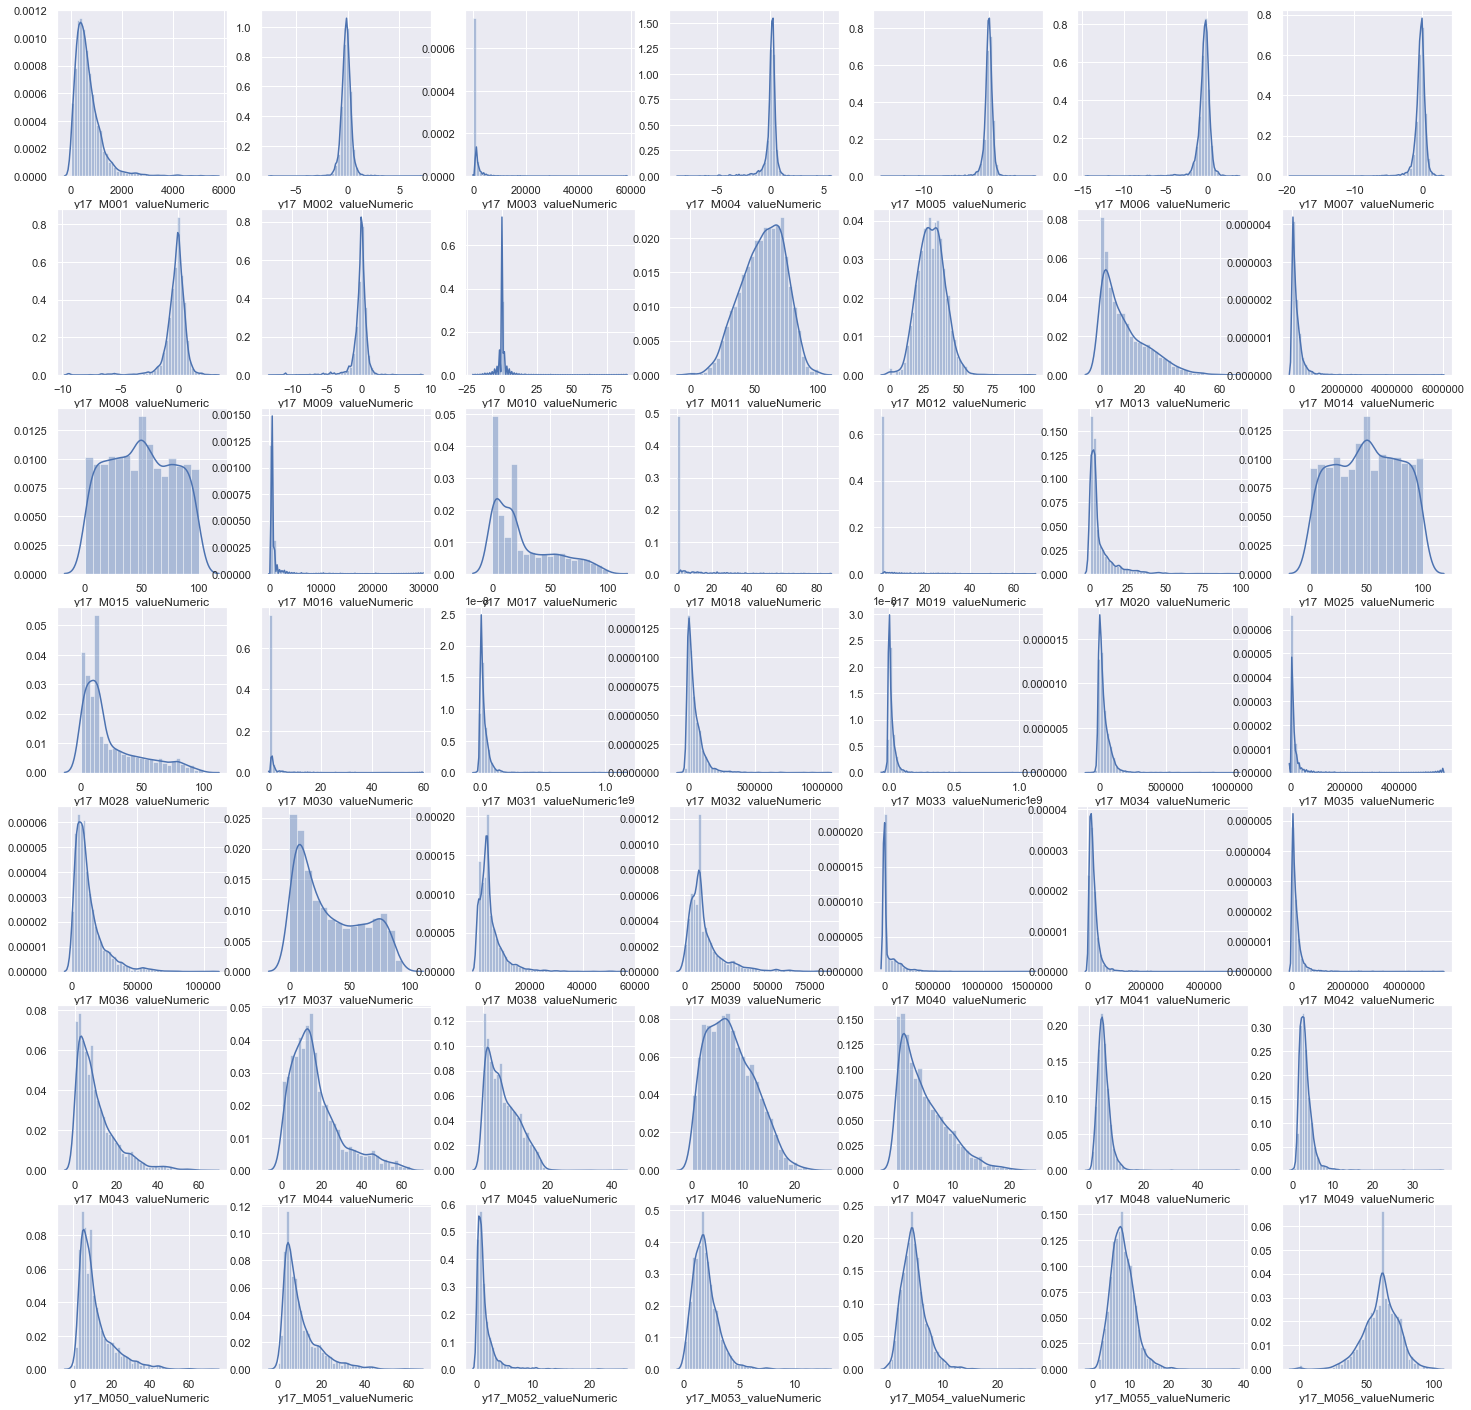

In [5]:
plt.figure(figsize=(25,25))
for i in range(0,49):
    plt.subplot(7, 7, i+1)
    sns.distplot(inputs[inputs.columns[i]])

plt.show()

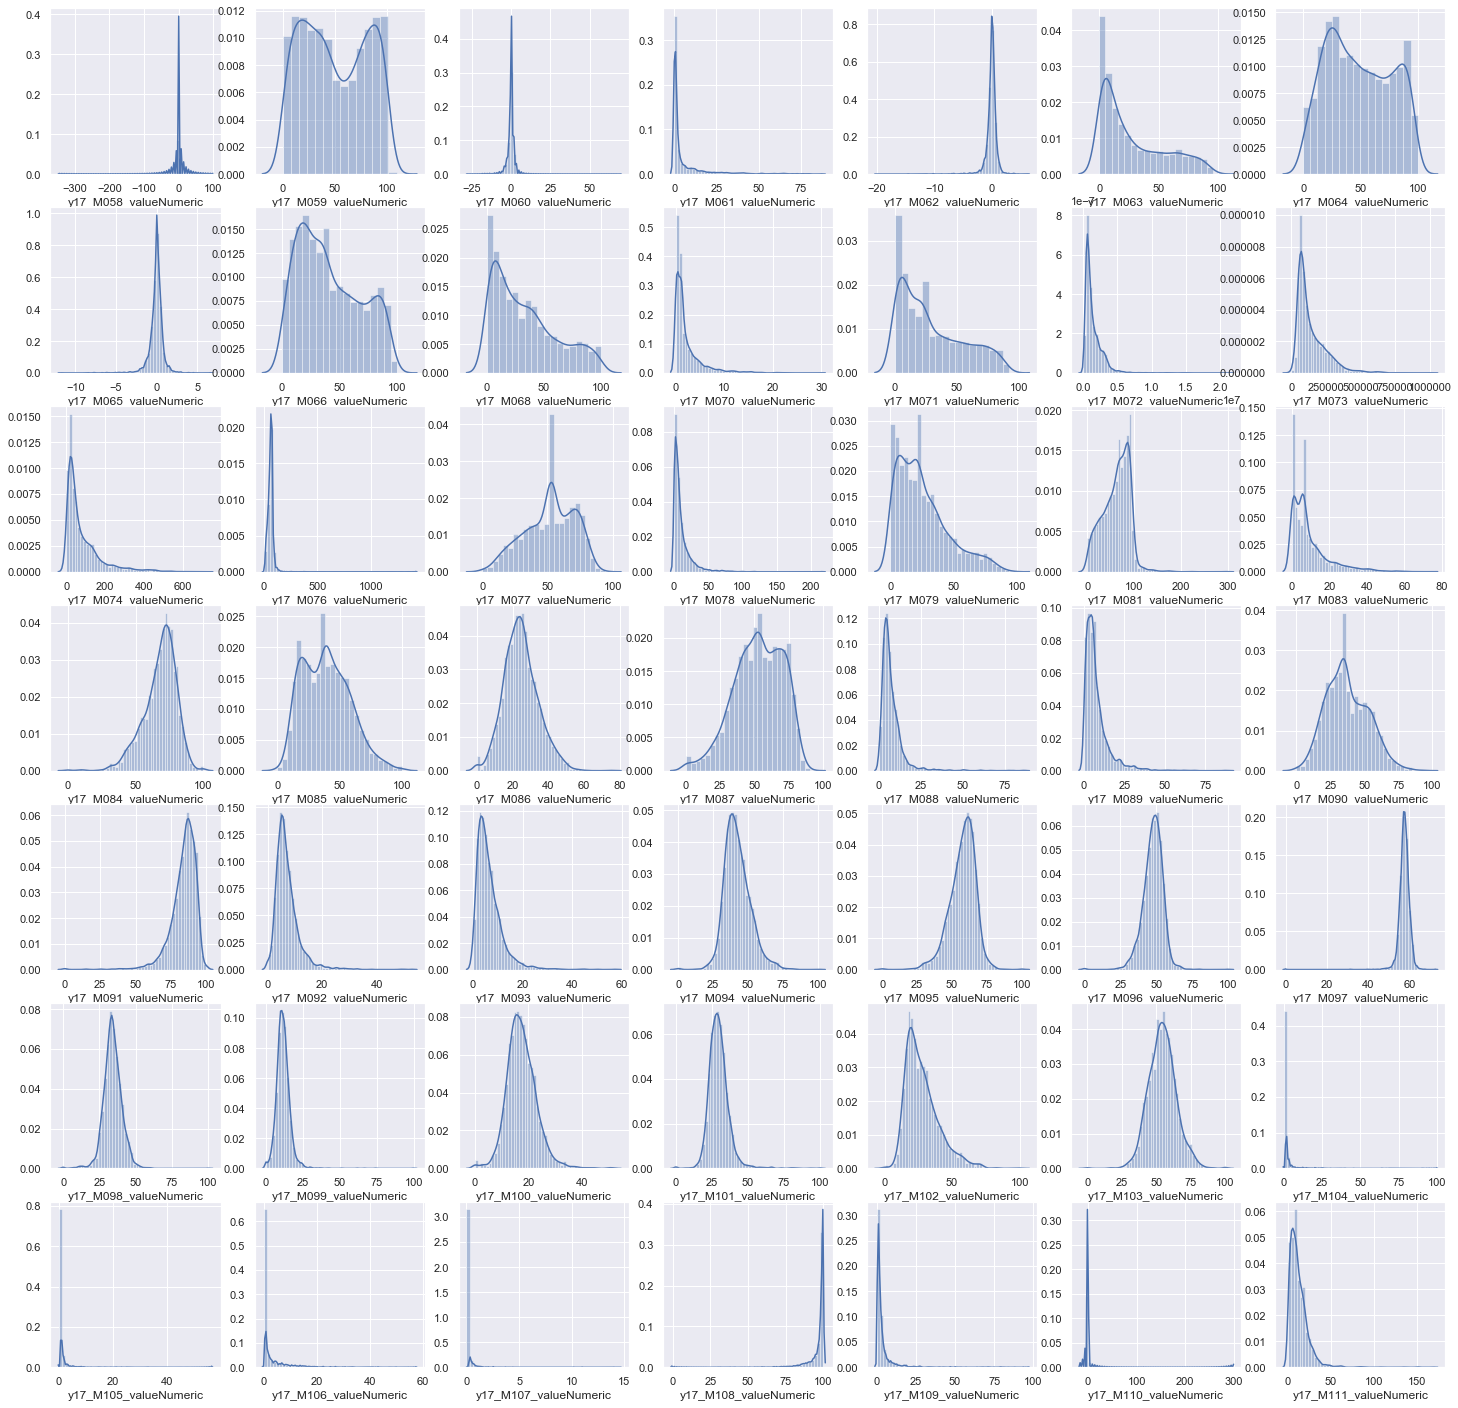

In [26]:
plt.figure(figsize=(25,25))
for i in range(49,98):
    plt.subplot(7, 7, i-48)
    sns.distplot(inputs[inputs.columns[i]])

plt.show()

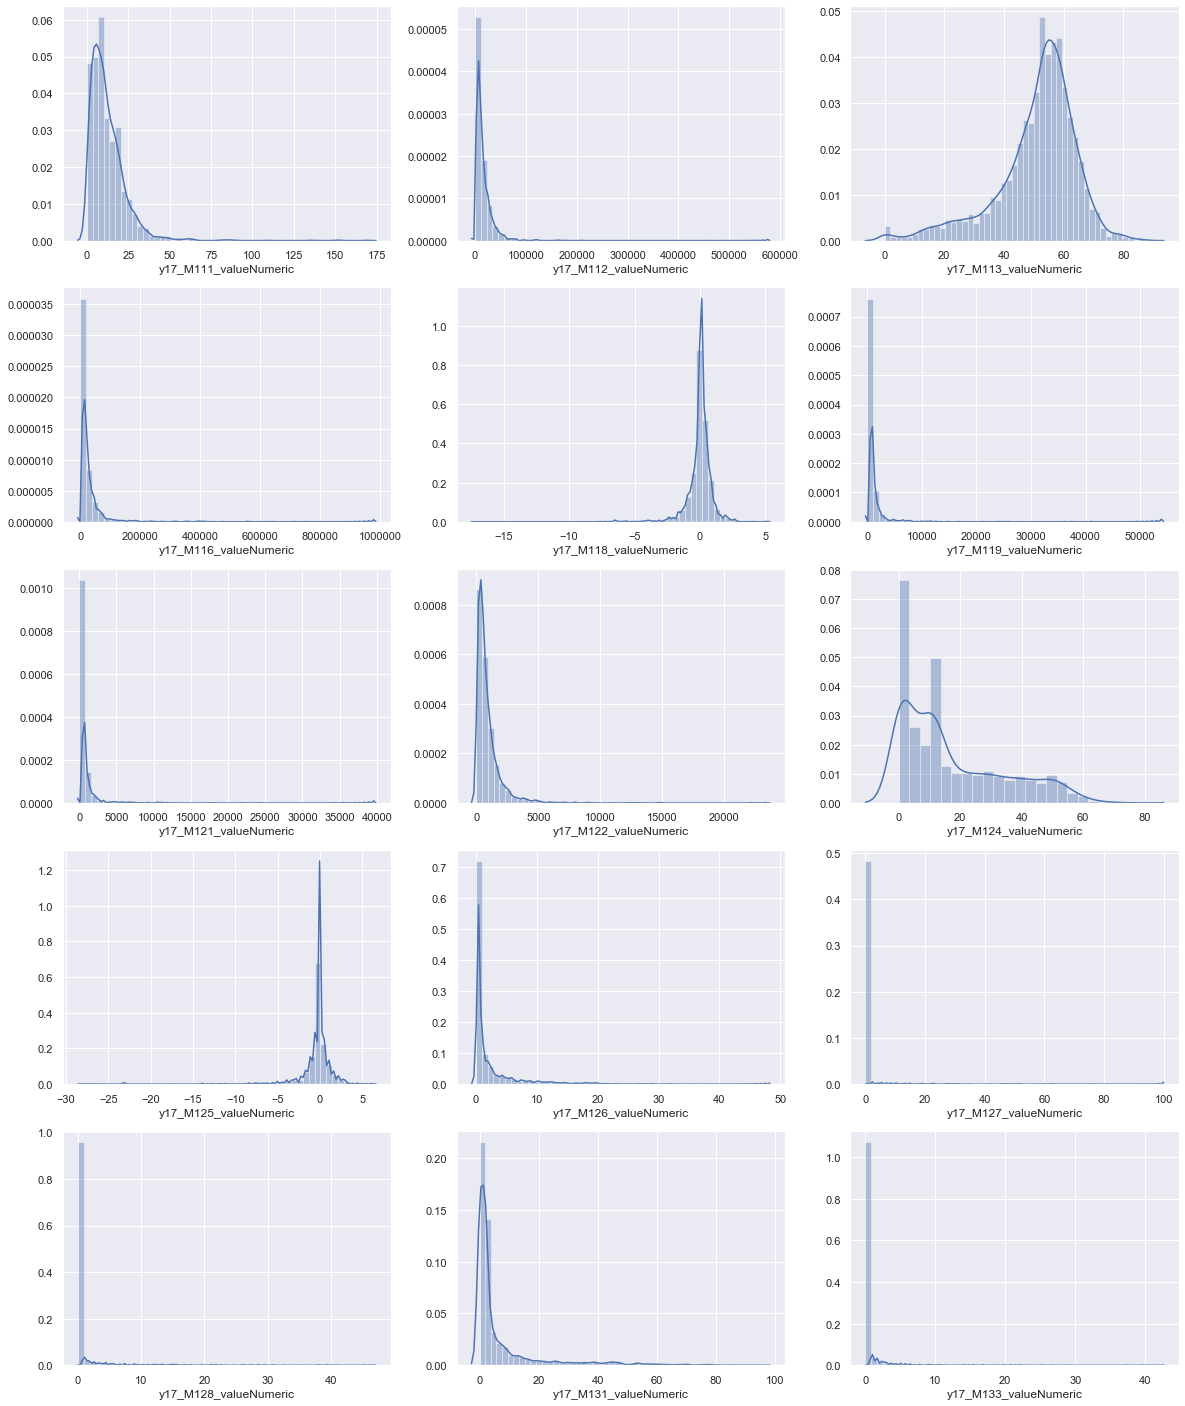

In [36]:
plt.figure(figsize=(20,25))
for i in range(98,113):
    plt.subplot(5, 3, i-97)
    sns.distplot(inputs[inputs.columns[i]])
plt.show()

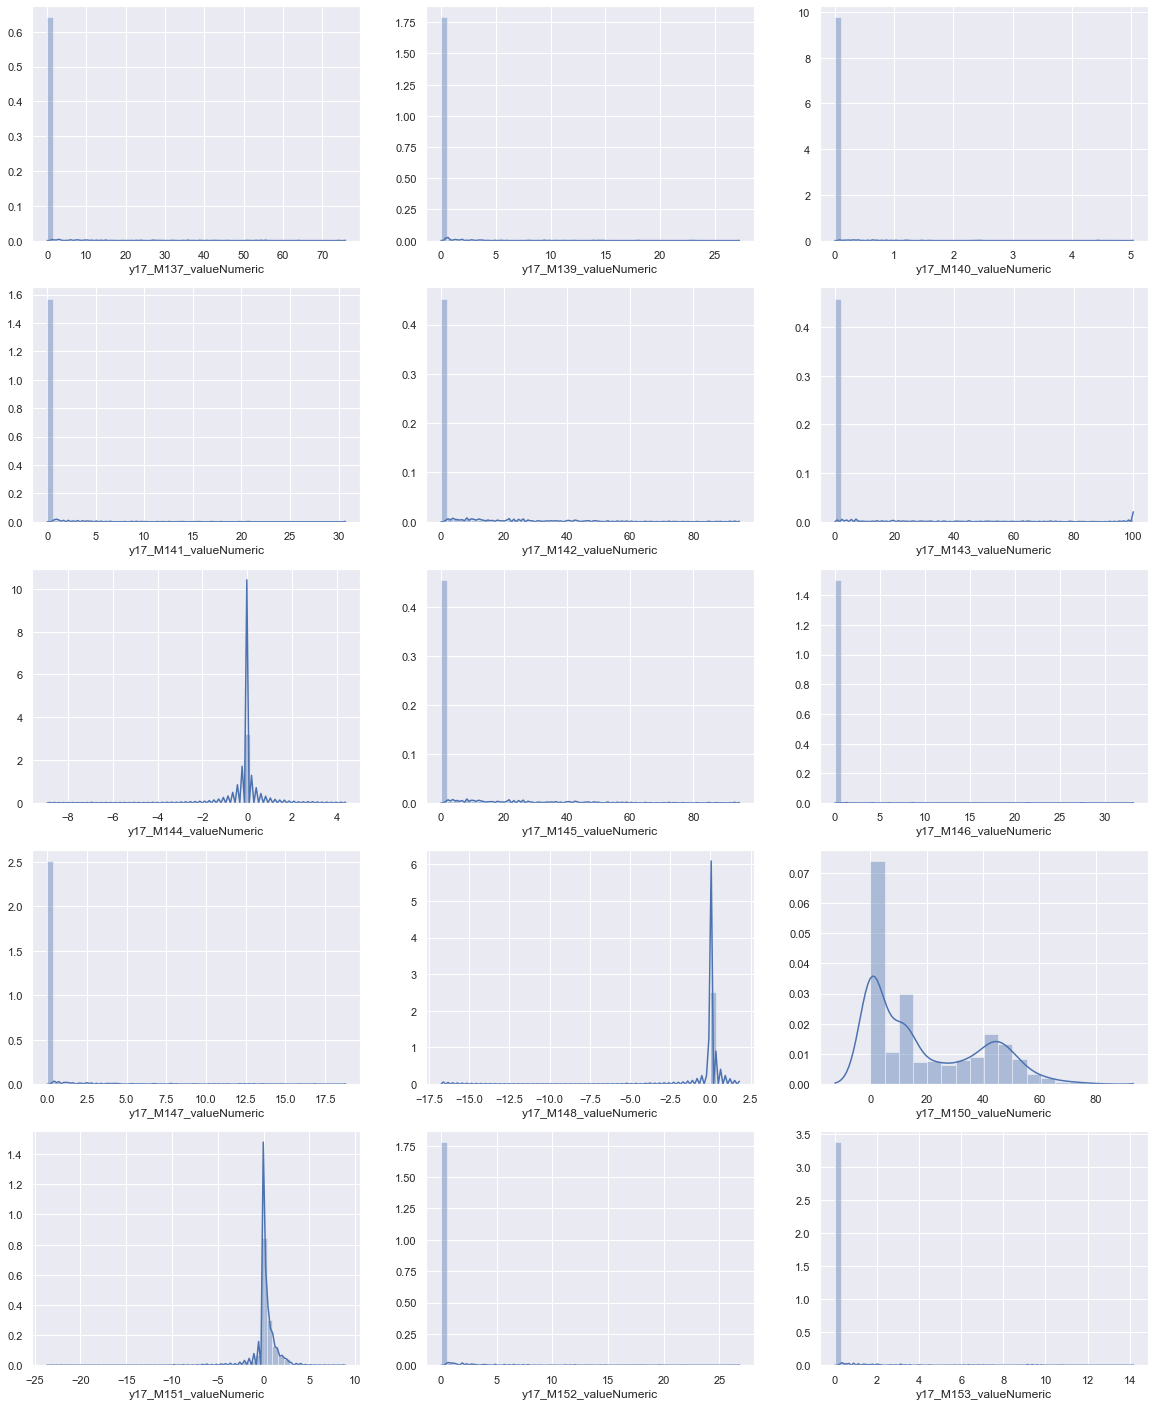

In [32]:
plt.figure(figsize=(20,25))
for i in range(113,128):
    plt.subplot(5, 3, i-112)
    sns.distplot(inputs[inputs.columns[i]])
plt.show()

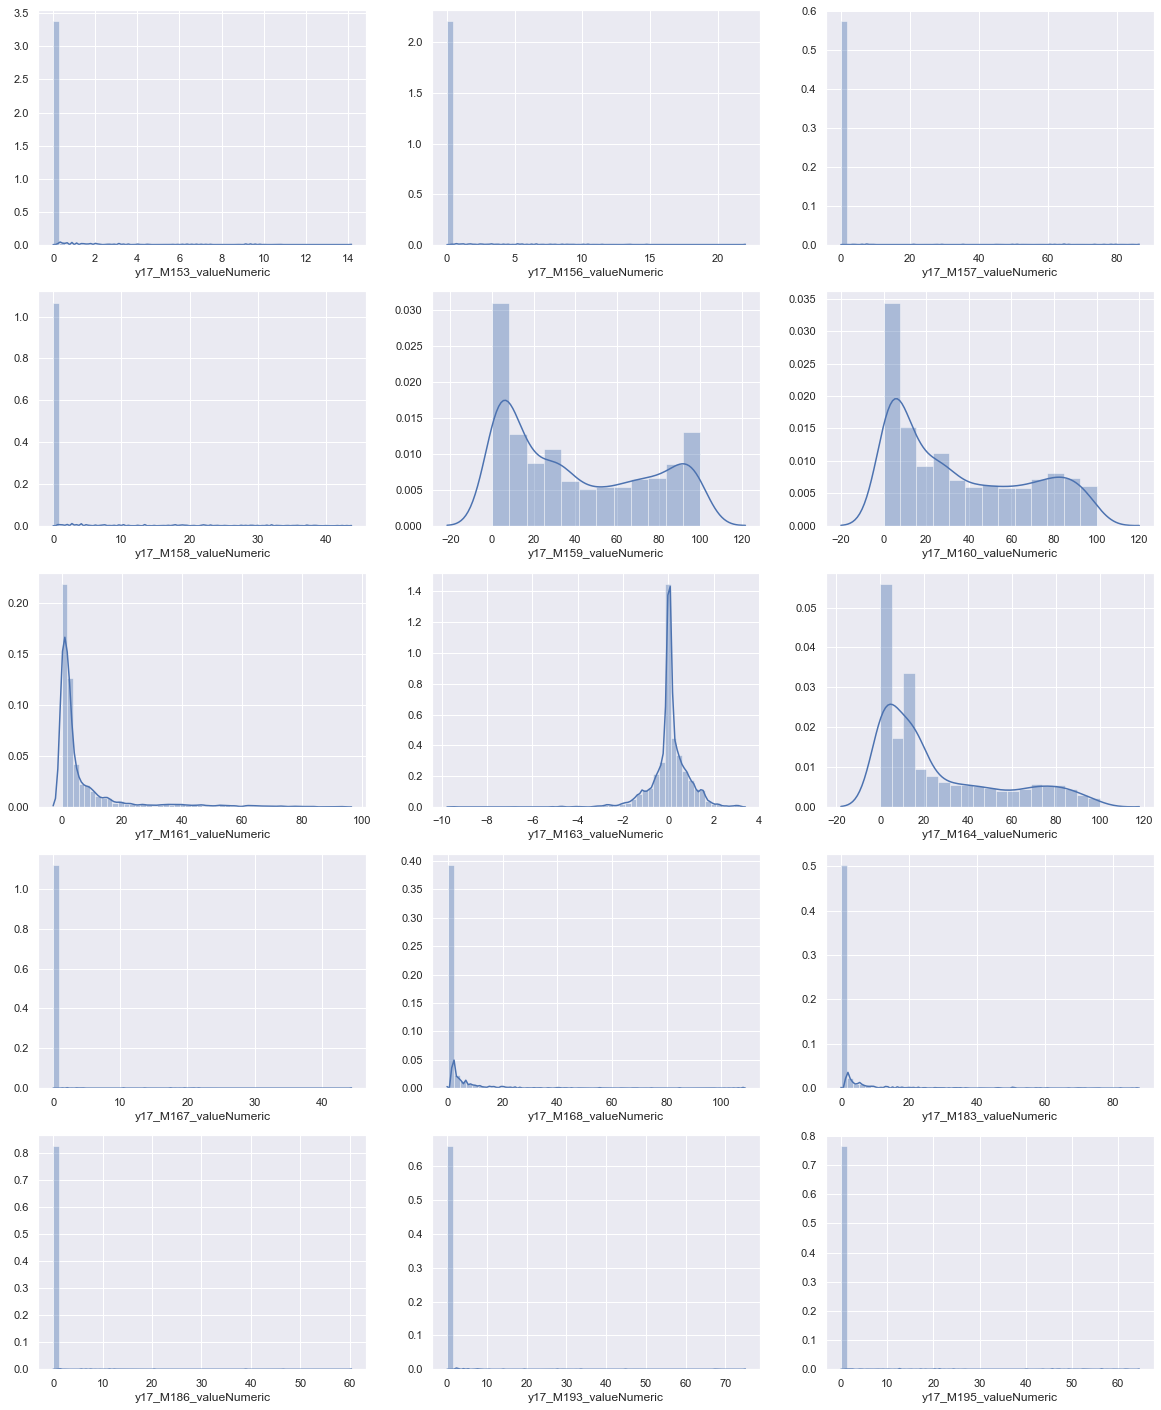

In [37]:
plt.figure(figsize=(20,25))
for i in range(128,143):
    plt.subplot(5, 3, i-127)
    sns.distplot(inputs[inputs.columns[i]])
plt.show()


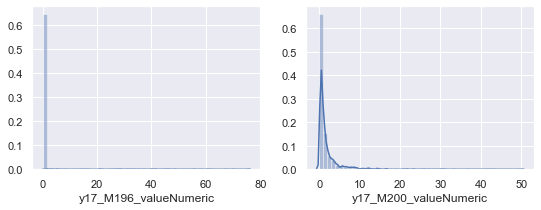

In [38]:
plt.figure(figsize=(9,3))
for i in range(143,145):
    plt.subplot(1,2 , i-142)
    sns.distplot(inputs[inputs.columns[i]])
plt.show()

# Outliers

## y17_M001_valueNumeric

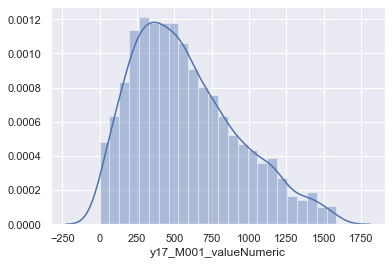

In [6]:
q=my_data['y17_M001_valueNumeric'].quantile(0.95)
data1=my_data[my_data['y17_M001_valueNumeric']<q]
sns.distplot(data1['y17_M001_valueNumeric'])

## y17_M053

In [72]:
data1['y17_M120_valueNumeric']

Index(['y17_M001_valueNumeric', 'y17_M002_valueNumeric',
       'y17_M003_valueNumeric', 'y17_M004_valueNumeric',
       'y17_M005_valueNumeric', 'y17_M006_valueNumeric',
       'y17_M007_valueNumeric', 'y17_M008_valueNumeric',
       'y17_M009_valueNumeric', 'y17_M010_valueNumeric',
       ...
       'y17_M164_valueNumeric', 'y17_M167_valueNumeric',
       'y17_M168_valueNumeric', 'y17_M183_valueNumeric',
       'y17_M186_valueNumeric', 'y17_M193_valueNumeric',
       'y17_M195_valueNumeric', 'y17_M196_valueNumeric',
       'y17_M200_valueNumeric', 'y17_M201_valueNumeric'],
      dtype='object', name='index', length=146)

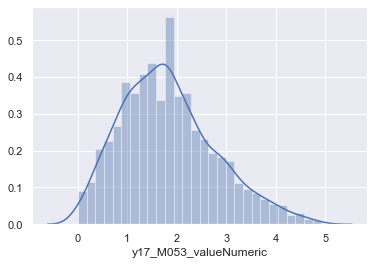

In [7]:
q1=data1['y17_M053_valueNumeric'].quantile(0.98)
data2=data1[data1['y17_M053_valueNumeric']<q1]

sns.distplot(data2['y17_M053_valueNumeric'])

## y17_M054_valueNumeric

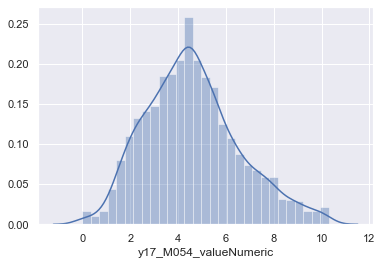

In [8]:
q2=data2['y17_M054_valueNumeric'].quantile(0.98)
data3=data2[data2['y17_M054_valueNumeric']<q2]
sns.distplot(data3['y17_M054_valueNumeric'])

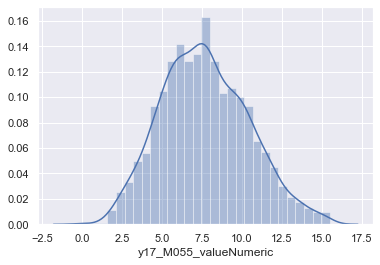

In [9]:
q3=data3['y17_M055_valueNumeric'].quantile(0.98)
data4=data3[data3['y17_M055_valueNumeric']<q3]
sns.distplot(data4['y17_M055_valueNumeric'])

## y17_M056_valueNumeric'

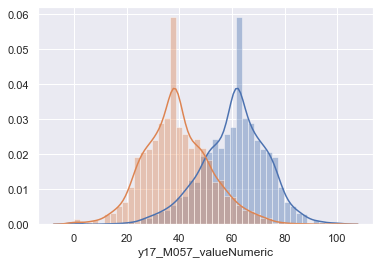

In [13]:
sns.distplot(data4['y17_M056_valueNumeric']) 
sns.distplot(data4['y17_M057_valueNumeric'])

## y17_M084_valueNumeric

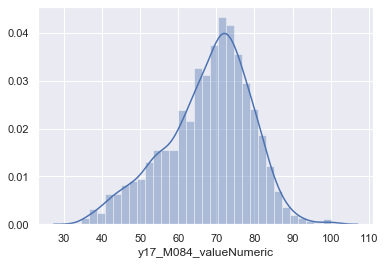

In [10]:
q4=data4['y17_M084_valueNumeric'].quantile(0.01)
data5=data4[data4['y17_M084_valueNumeric']>q4]
sns.distplot(data5['y17_M084_valueNumeric'])

## y17_M089_valueNumeric

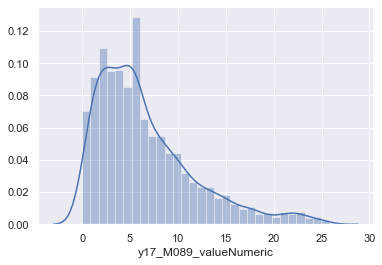

In [11]:
q5=data5['y17_M089_valueNumeric'].quantile(0.97)
data6=data5[data5['y17_M089_valueNumeric']<q5]
sns.distplot(data6['y17_M089_valueNumeric'])

## y17_M088_valueNumeric

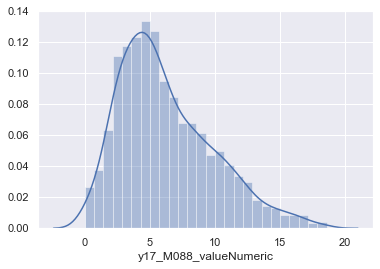

In [12]:
q6=data6['y17_M088_valueNumeric'].quantile(0.98)
data7=data6[data6['y17_M088_valueNumeric']<q6]
sns.distplot(data7['y17_M088_valueNumeric'])


## y17_M091_valueNumeric'

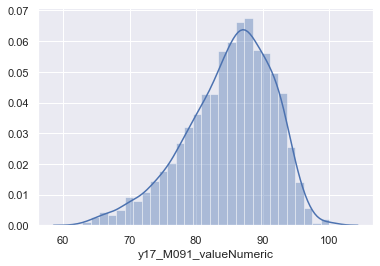

In [13]:
q7=data7['y17_M091_valueNumeric'].quantile(0.01)
data8=data7[data7['y17_M091_valueNumeric']>q7]
sns.distplot(data8['y17_M091_valueNumeric'])

## y17_M093_valueNumeric

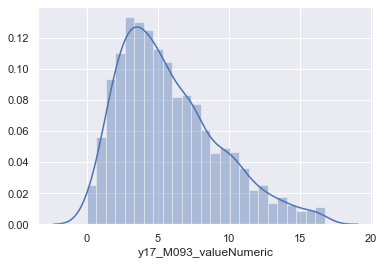

In [14]:
q8=data8['y17_M093_valueNumeric'].quantile(0.98)
data9=data8[data8['y17_M093_valueNumeric']<q8]
sns.distplot(data9['y17_M093_valueNumeric'])

## y17_M099_valueNumeric

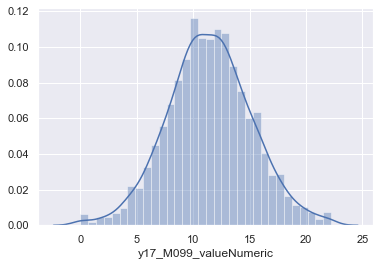

In [15]:
q9=data9['y17_M099_valueNumeric'].quantile(0.99)
data10=data9[data9['y17_M099_valueNumeric']<q9]
sns.distplot(data10['y17_M099_valueNumeric'])

## y17_M110_valueNumeric

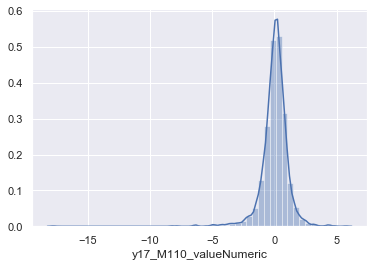

In [16]:
q10=data10['y17_M110_valueNumeric'].quantile(0.99999)
data11=data10[data10['y17_M110_valueNumeric']<q10]
sns.distplot(data11['y17_M110_valueNumeric'])

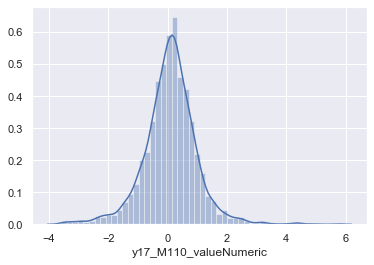

In [17]:
q11=data11['y17_M110_valueNumeric'].quantile(0.01)
data12=data11[data11['y17_M110_valueNumeric']>q11]
sns.distplot(data12['y17_M110_valueNumeric'])

## 'y17_M118_valueNumeric'

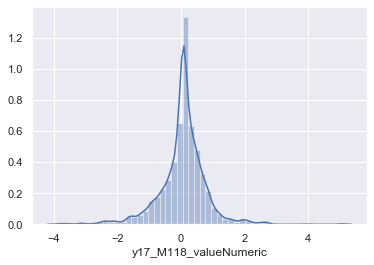

In [18]:
q12=data12['y17_M118_valueNumeric'].quantile(0.01)
data13=data12[data12['y17_M118_valueNumeric']>q12]

sns.distplot(data13['y17_M118_valueNumeric'])

## y17_M144_valueNumeric

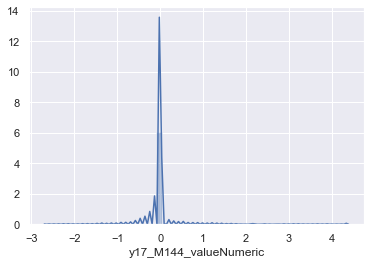

In [19]:
q13=data13['y17_M144_valueNumeric'].quantile(0.01)
data14=data13[data13['y17_M144_valueNumeric']>q13]

sns.distplot(data14['y17_M144_valueNumeric'])

## y17_M151_valueNumeric

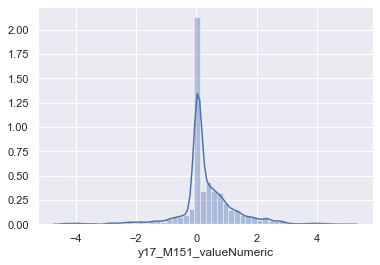

In [20]:
q14=data14['y17_M151_valueNumeric'].quantile(0.01)
data15=data14[data14['y17_M151_valueNumeric']>q14]
sns.distplot(data15['y17_M151_valueNumeric'])

## y17_M163_valueNumeric

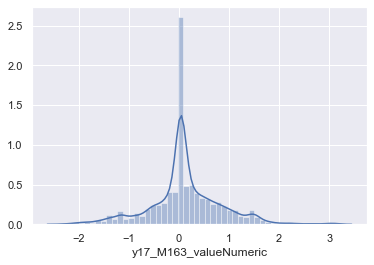

In [21]:
q15=data15['y17_M163_valueNumeric'].quantile(0.01)
data16=data15[data15['y17_M163_valueNumeric']>q15]
sns.distplot(data16['y17_M163_valueNumeric'])


## y17_M041_valueNumeric

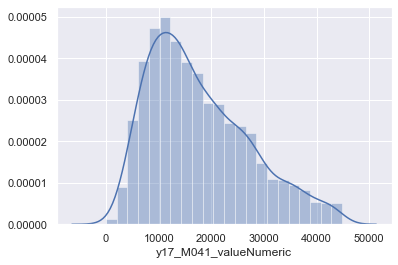

In [22]:
q16=data16['y17_M041_valueNumeric'].quantile(0.95)
data17=data16[data16['y17_M041_valueNumeric']<q16]
sns.distplot(data17['y17_M041_valueNumeric'])

# Reset column names

In [23]:
# rearrage it a little bit 

col_name=data17.columns.sort_values()
col_name
#Variable_Lookup['MapTitle']

Index(['y17_M001_valueNumeric', 'y17_M002_valueNumeric',
       'y17_M003_valueNumeric', 'y17_M004_valueNumeric',
       'y17_M005_valueNumeric', 'y17_M006_valueNumeric',
       'y17_M007_valueNumeric', 'y17_M008_valueNumeric',
       'y17_M009_valueNumeric', 'y17_M010_valueNumeric',
       ...
       'y17_M164_valueNumeric', 'y17_M167_valueNumeric',
       'y17_M168_valueNumeric', 'y17_M183_valueNumeric',
       'y17_M186_valueNumeric', 'y17_M193_valueNumeric',
       'y17_M195_valueNumeric', 'y17_M196_valueNumeric',
       'y17_M200_valueNumeric', 'y17_M201_valueNumeric'],
      dtype='object', name='index', length=146)

In [27]:
vl=Variable_Lookup.sort_values(by='MapID').reset_index().drop(columns='index')
vl.head()

,MapID,Category,Subcategory,MapTitle
0,y17_M001,Farms,Farms,Number of Farms: 2017
1,y17_M002,Farms,Farms,Change in Number of Farms: 2012 to 2017
2,y17_M003,Farms,Farms by Size,Average Size of Farms in Acres: 2017
3,y17_M004,Farms,Farms by Size,Change in Number of Farms with Less Than 10 Ac...
4,y17_M005,Farms,Farms by Size,Change in Number of Farms with 10 to 49 Acres:...


In [28]:
list_names=[]
for i in range(len(vl)):
    for j in col_name:
        if  vl['MapID'][i] in j:
            list_names.append(vl['MapTitle'][i])
list_names

['Number of Farms: 2017',
 'Change in Number of Farms: 2012 to 2017',
 'Average Size of Farms in Acres: 2017',
 'Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
 'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
 'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
 'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
 'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
 'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
 'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017',
 'Percent of Farms with Sales of Less Than $10,000: 2017',
 'Percent of Farms with Sales of $10,000 to $249,999: 2017',
 'Percent of Farms with Sales of $250,000 or More: 2017',
 'Average Value of Agricultural Products Sold per Farm: 2017',
 'Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
 'Average Value of Crops Sold per Acre of Harvested Cropland: 2017',
 'Value of Grains,

In [29]:
len(data17.columns),len(list_names)

(146, 146)

In [30]:
data17.columns=list_names
data17.head()

,Number of Farms: 2017,Change in Number of Farms: 2012 to 2017,Average Size of Farms in Acres: 2017,Change in Number of Farms with Less Than 10 Acres: 2012 to 2017,Change in Number of Farms with 10 to 49 Acres: 2012 to 2017,Change in Number of Farms with 50 to 179 Acres: 2012 to 2017,Change in Number of Farms with 180 to 499 Acres: 2012 to 2017,Change in Number of Farms with 500 to 999 Acres: 2012 to 2017,"Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017","Change in Number of Farms with 2,000 Acres or More: 2012 to 2017",...,Acres of Other Dry Hay Harvested as Percent of Harvested Cropland Acreage: 2017,Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017,"Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017",Acres of Land in Orchards as Percent of Cropland Acreage: 2017,"Total Acres of Avocados, as Percent of Land in Orchards: 2017","Total Acres of Grapefruit, as Percent of Land in Orchards: 2017","Total Acres of Valencia Oranges, as Percent of Land in Orchards: 2017","Total Acres of Oranges, Other Than Valencia, as Percent of Land in Orchards: 2017",Number of Farms with Floriculture Crops Grown for Sale as Percent of All Farms: 2017,Percent of Farms with Internet Access: 2017
0,371,-0.17,305.0,0.03,-0.16,-0.13,-0.21,0.05,0.00,-0.27,...,50.46,0.0,4.38,0.72,0.0,0.0,0.00,0.00,0.27,76.82
1,842,-0.59,208.0,0.01,-0.47,-1.05,-0.79,0.36,0.44,-0.46,...,10.77,0.0,1.75,2.01,0.0,0.0,0.01,0.14,2.85,78.15
2,498,-0.50,307.0,-0.06,0.56,-0.69,-0.63,-0.38,0.23,-1.02,...,41.83,0.0,0.24,1.38,0.0,0.0,0.00,0.00,0.20,60.64
3,205,0.27,273.0,0.44,-0.05,-0.25,0.54,-1.38,-0.23,1.47,...,70.77,0.0,0.05,0.17,0.0,0.0,0.00,0.00,0.00,73.17
4,1146,-0.28,129.0,0.04,-0.22,-0.54,0.23,-0.12,0.42,-0.62,...,77.72,0.0,1.86,0.71,0.0,0.0,0.00,0.00,0.70,74.61


In [31]:
data17['Total Income from Farm-Related Sources, Average per Farm: 2017']

0       20586.0
1       13758.0
2       12182.0
3       14584.0
4        7065.0
         ...   
3073    26718.0
3074    27047.0
3076    15299.0
3077    25735.0
3078    15223.0
Name: Total Income from Farm-Related Sources, Average per Farm: 2017, Length: 2239, dtype: float64

In [32]:

#save the output locally
#pickle_out1=open('data17', 'wb')
#pickle.dump(data17, pickle_out1)
#pickle_out1.close()

pickle_in = open("data17","rb")
data17 = pickle.load(pickle_in)


# Liearty

In [33]:
dependent_var='Total Income from Farm-Related Sources, Average per Farm: 2017'

In [34]:
min(data17[dependent_var]),np.median(data17[dependent_var])

(0.0, 15577.0)

In [35]:
depen_var=[]
for i in data17[dependent_var]:
    if i==min(data17[dependent_var]):
        i=1
        depen_var.append(i)
    else:
        depen_var.append(i)
depen_var[:5]   

[20586.0, 13758.0, 12182.0, 14584.0, 7065.0]

In [36]:
data17[dependent_var]=depen_var

In [84]:
data17

,Number of Farms: 2017,Change in Number of Farms: 2012 to 2017,Average Size of Farms in Acres: 2017,Change in Number of Farms with Less Than 10 Acres: 2012 to 2017,Change in Number of Farms with 10 to 49 Acres: 2012 to 2017,Change in Number of Farms with 50 to 179 Acres: 2012 to 2017,Change in Number of Farms with 180 to 499 Acres: 2012 to 2017,Change in Number of Farms with 500 to 999 Acres: 2012 to 2017,"Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017","Change in Number of Farms with 2,000 Acres or More: 2012 to 2017",...,Acres of Other Dry Hay Harvested as Percent of Harvested Cropland Acreage: 2017,Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017,"Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017",Acres of Land in Orchards as Percent of Cropland Acreage: 2017,"Total Acres of Avocados, as Percent of Land in Orchards: 2017","Total Acres of Grapefruit, as Percent of Land in Orchards: 2017","Total Acres of Valencia Oranges, as Percent of Land in Orchards: 2017","Total Acres of Oranges, Other Than Valencia, as Percent of Land in Orchards: 2017",Number of Farms with Floriculture Crops Grown for Sale as Percent of All Farms: 2017,Percent of Farms with Internet Access: 2017
0,371,-0.17,305.0,0.03,-0.16,-0.13,-0.21,0.05,0.00,-0.27,...,50.46,0.0,4.38,0.72,0.0,0.0,0.00,0.00,0.27,76.82
1,842,-0.59,208.0,0.01,-0.47,-1.05,-0.79,0.36,0.44,-0.46,...,10.77,0.0,1.75,2.01,0.0,0.0,0.01,0.14,2.85,78.15
2,498,-0.50,307.0,-0.06,0.56,-0.69,-0.63,-0.38,0.23,-1.02,...,41.83,0.0,0.24,1.38,0.0,0.0,0.00,0.00,0.20,60.64
3,205,0.27,273.0,0.44,-0.05,-0.25,0.54,-1.38,-0.23,1.47,...,70.77,0.0,0.05,0.17,0.0,0.0,0.00,0.00,0.00,73.17
4,1146,-0.28,129.0,0.04,-0.22,-0.54,0.23,-0.12,0.42,-0.62,...,77.72,0.0,1.86,0.71,0.0,0.0,0.00,0.00,0.70,74.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,402,0.02,1359.0,0.40,-0.19,1.09,-1.93,-0.30,-0.17,-0.24,...,85.76,0.0,0.23,0.00,0.0,0.0,0.00,0.00,0.00,84.33
3074,219,-0.39,6256.0,-0.43,-0.03,0.61,-0.85,-0.95,0.08,-1.00,...,40.21,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,82.65
3076,403,0.58,1630.0,0.26,0.65,0.22,-0.20,-0.56,0.40,0.38,...,75.62,0.0,0.23,0.00,0.0,0.0,0.00,0.00,0.00,80.89
3077,246,0.39,1285.0,-0.08,0.29,1.25,0.25,-0.21,0.00,-0.07,...,15.33,0.0,0.23,0.11,0.0,0.0,0.00,0.00,0.00,91.06


In [37]:
min(data17[dependent_var])

1.0

In [118]:
cleaned_data=data17.copy()
cleaned_data.head(3)

,Number of Farms: 2017,Change in Number of Farms: 2012 to 2017,Average Size of Farms in Acres: 2017,Change in Number of Farms with Less Than 10 Acres: 2012 to 2017,Change in Number of Farms with 10 to 49 Acres: 2012 to 2017,Change in Number of Farms with 50 to 179 Acres: 2012 to 2017,Change in Number of Farms with 180 to 499 Acres: 2012 to 2017,Change in Number of Farms with 500 to 999 Acres: 2012 to 2017,"Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017","Change in Number of Farms with 2,000 Acres or More: 2012 to 2017",...,Acres of Other Dry Hay Harvested as Percent of Harvested Cropland Acreage: 2017,Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017,"Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017",Acres of Land in Orchards as Percent of Cropland Acreage: 2017,"Total Acres of Avocados, as Percent of Land in Orchards: 2017","Total Acres of Grapefruit, as Percent of Land in Orchards: 2017","Total Acres of Valencia Oranges, as Percent of Land in Orchards: 2017","Total Acres of Oranges, Other Than Valencia, as Percent of Land in Orchards: 2017",Number of Farms with Floriculture Crops Grown for Sale as Percent of All Farms: 2017,Percent of Farms with Internet Access: 2017
0,371,-0.17,305.0,0.03,-0.16,-0.13,-0.21,0.05,0.00,-0.27,...,50.46,0.0,4.38,0.72,0.0,0.0,0.00,0.00,0.27,76.82
1,842,-0.59,208.0,0.01,-0.47,-1.05,-0.79,0.36,0.44,-0.46,...,10.77,0.0,1.75,2.01,0.0,0.0,0.01,0.14,2.85,78.15
2,498,-0.50,307.0,-0.06,0.56,-0.69,-0.63,-0.38,0.23,-1.02,...,41.83,0.0,0.24,1.38,0.0,0.0,0.00,0.00,0.20,60.64


In [121]:
# Get the different quantile values of farm size
cleaned_data[cleaned_data.columns[2]].describe()
# create an empty list
size_dum=[]
for i in list(cleaned_data[cleaned_data.columns[2]].sort_values()):
    if i <=163:
        i=1
        size_dum.append(i)
    elif i>163 and i<=269:
        i=2
        size_dum.append(i)
    elif i>269 and i<=471:
        i=3
        size_dum.append(i)
    else:
        i=4
        size_dum.append(i)
# double check the size_dum list 
pd.DataFrame(size_dum)[0].value_counts()
# Add new column 
cleaned_data['farm_size']=size_dum
cleaned_data.head()
cleaned_data.columns
acres_categories_list = ['Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017']
if acres_categories_list[0] in cleaned_data.columns:
    cleaned_data.drop(columns = acres_categories_list, axis = 1, inplace=True)

In [120]:
cleaned_data.columns

Index(['Number of Farms: 2017', 'Change in Number of Farms: 2012 to 2017',
       'Average Size of Farms in Acres: 2017',
       'Percent of Farms with Sales of Less Than $10,000: 2017',
       'Percent of Farms with Sales of $10,000 to $249,999: 2017',
       'Percent of Farms with Sales of $250,000 or More: 2017',
       'Average Value of Agricultural Products Sold per Farm: 2017',
       'Value of Crops Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
       'Average Value of Crops Sold per Acre of Harvested Cropland: 2017',
       'Value of Grains, Oilseeds, Dry Beans, and Dry Peas Sold as Percent of Total Market Value of Agricultural Products Sold: 2017',
       ...
       'Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017',
       'Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017',
       'Acres of Land in Orchards as Percent of Cropland Acreage: 2017',
       'Total Acres of Avocados, as Percent 

In [39]:
#save the output locally
pickle_out2=open('cleaned_data', 'wb')
pickle.dump(cleaned_data, pickle_out2)
pickle_out2.close()

pickle_in2 = open("cleaned_data","rb")
cleaned_data = pickle.load(pickle_in2)

In [40]:
target=cleaned_data['Total Income from Farm-Related Sources, Average per Farm: 2017']
Inputs=cleaned_data.drop(columns='Total Income from Farm-Related Sources, Average per Farm: 2017')

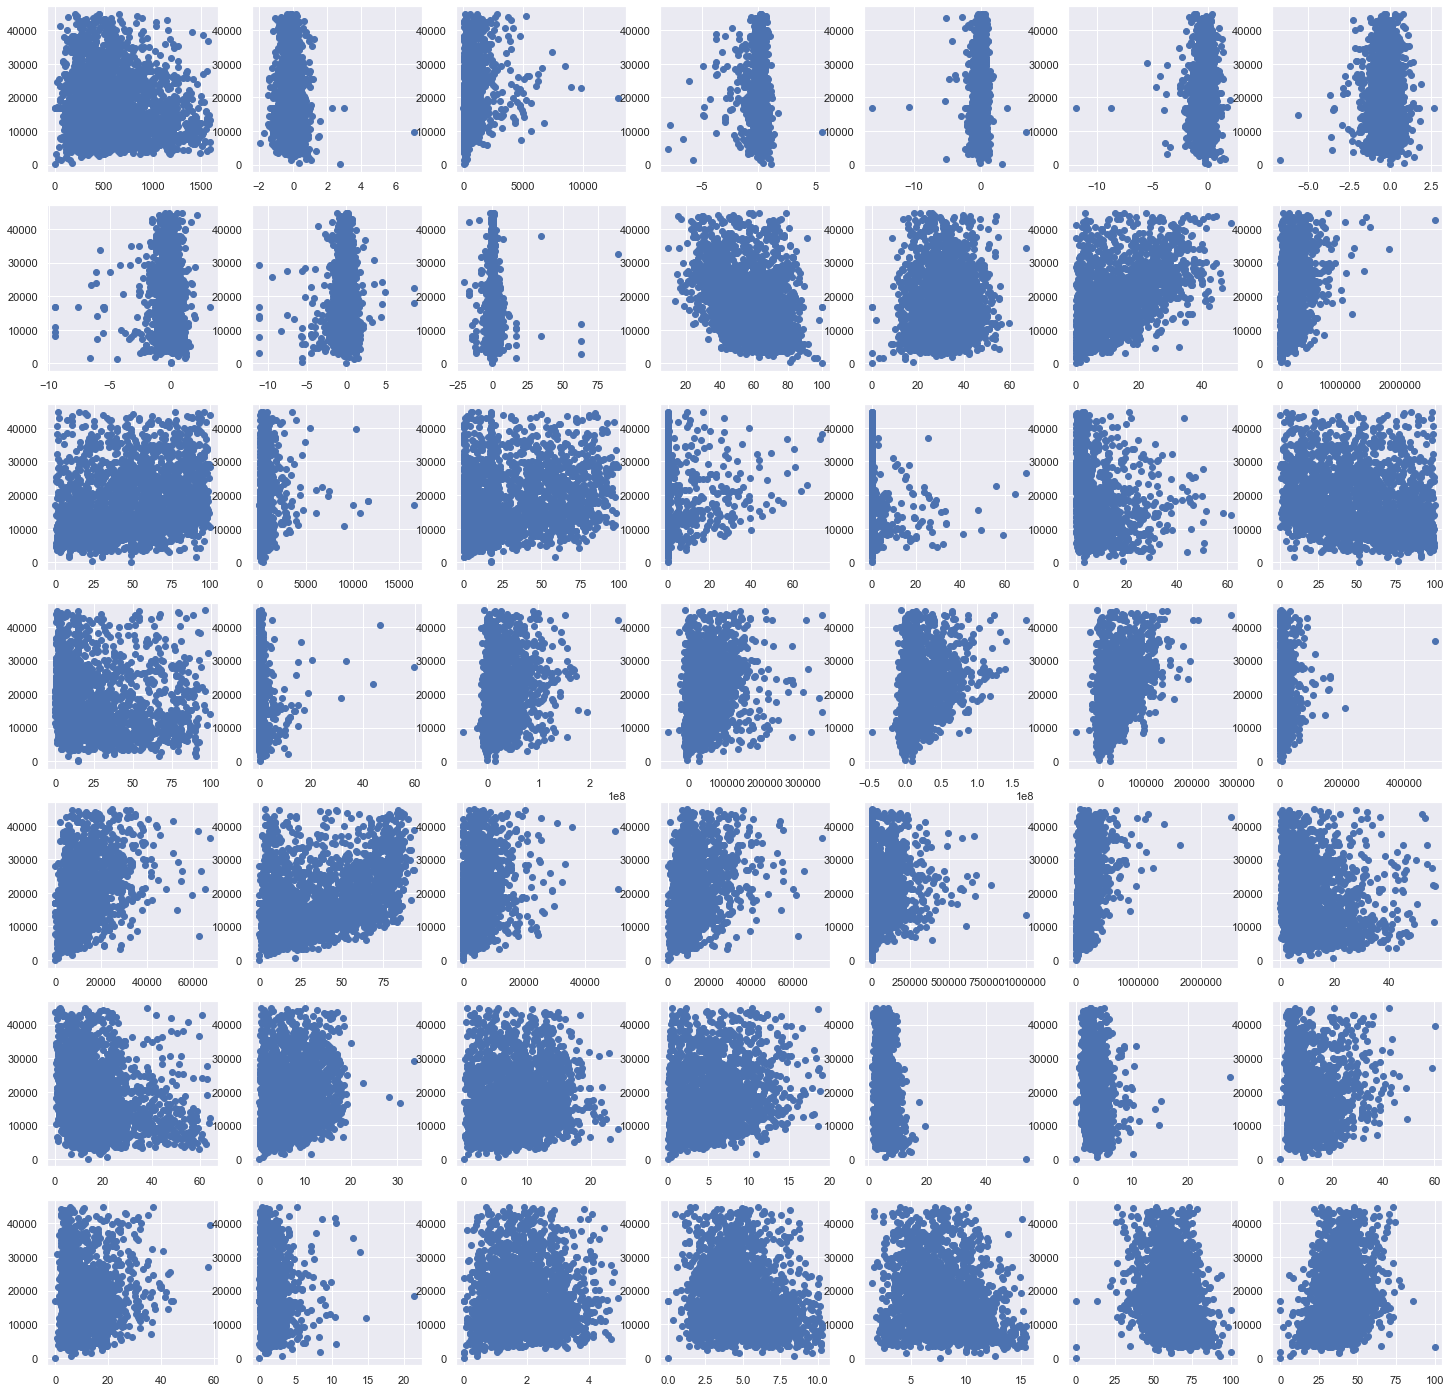

In [41]:
plt.figure(figsize=(25,25))
for i in range(0,49):
    plt.subplot(7, 7, i+1)
    plt.scatter(Inputs[Inputs.columns[i]],target)

plt.show()

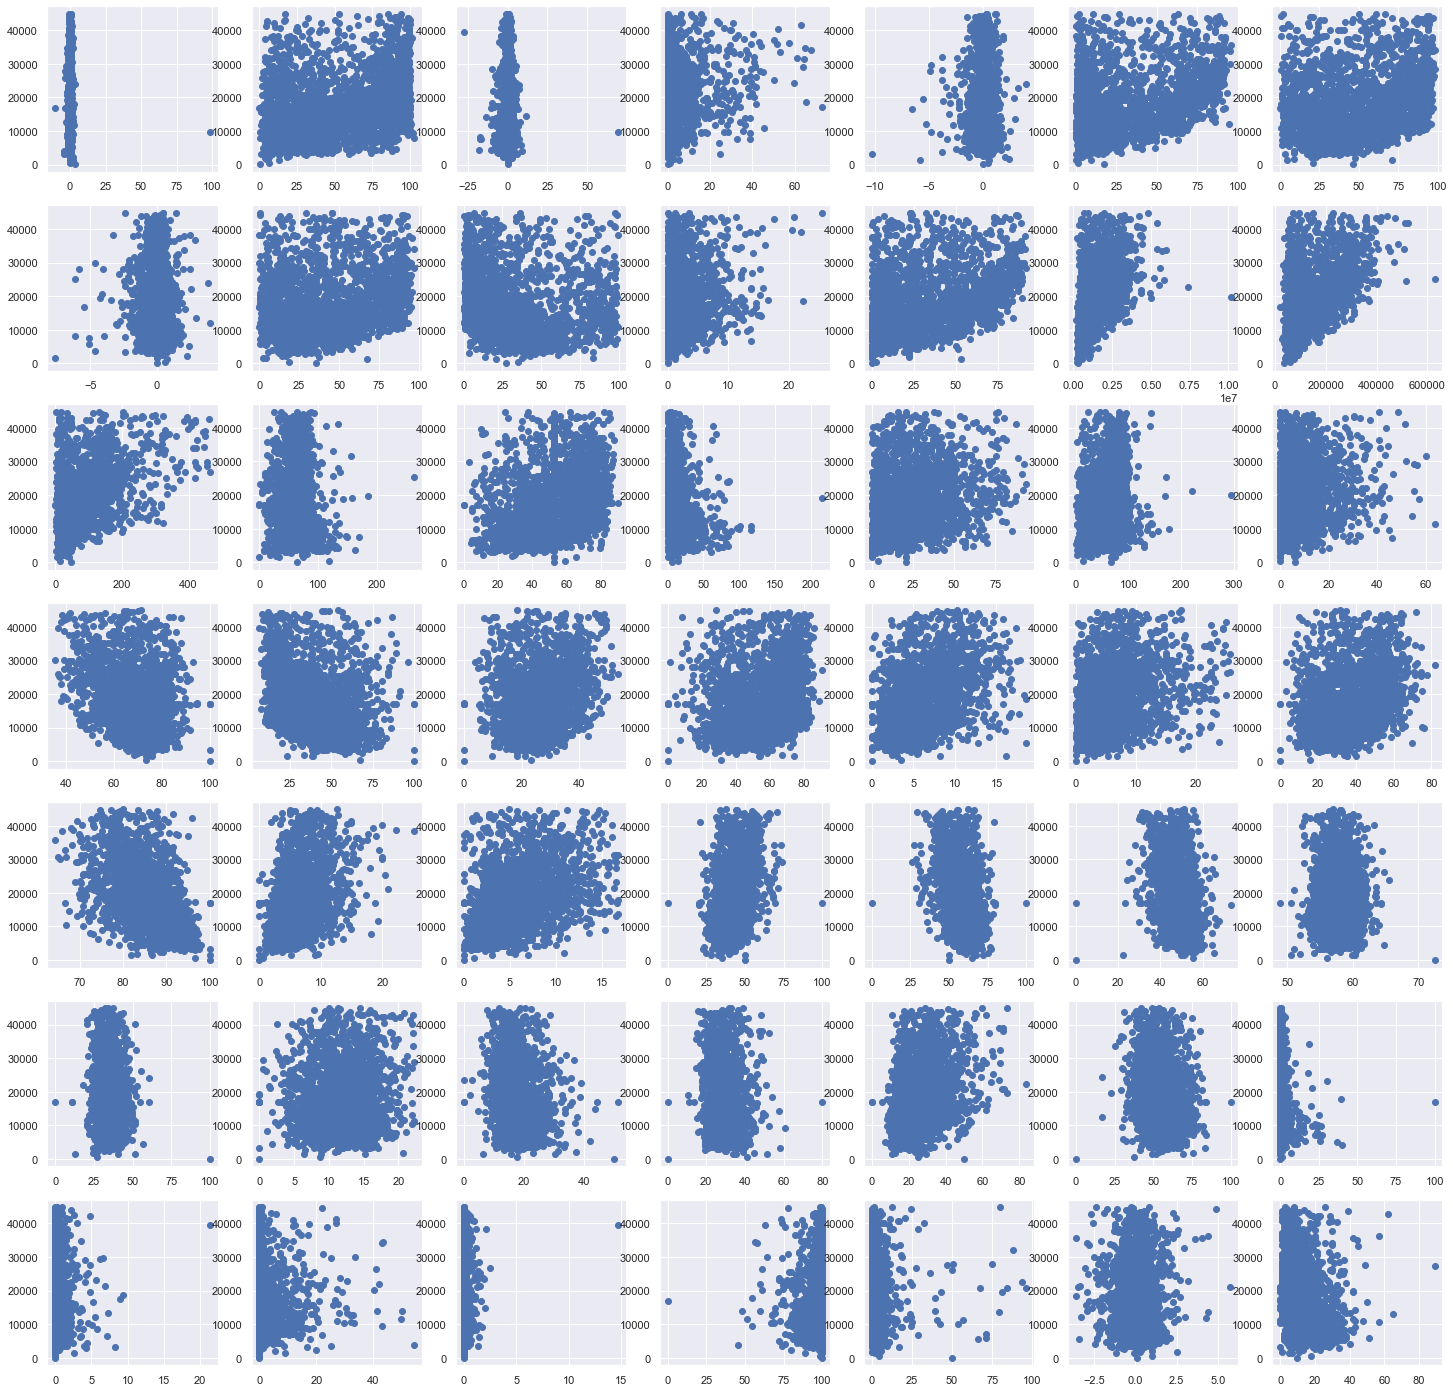

In [477]:
plt.figure(figsize=(25,25))
for i in range(49,98):
    plt.subplot(7, 7, i-48)
    plt.scatter(Inputs[Inputs.columns[i]],target)

plt.show()

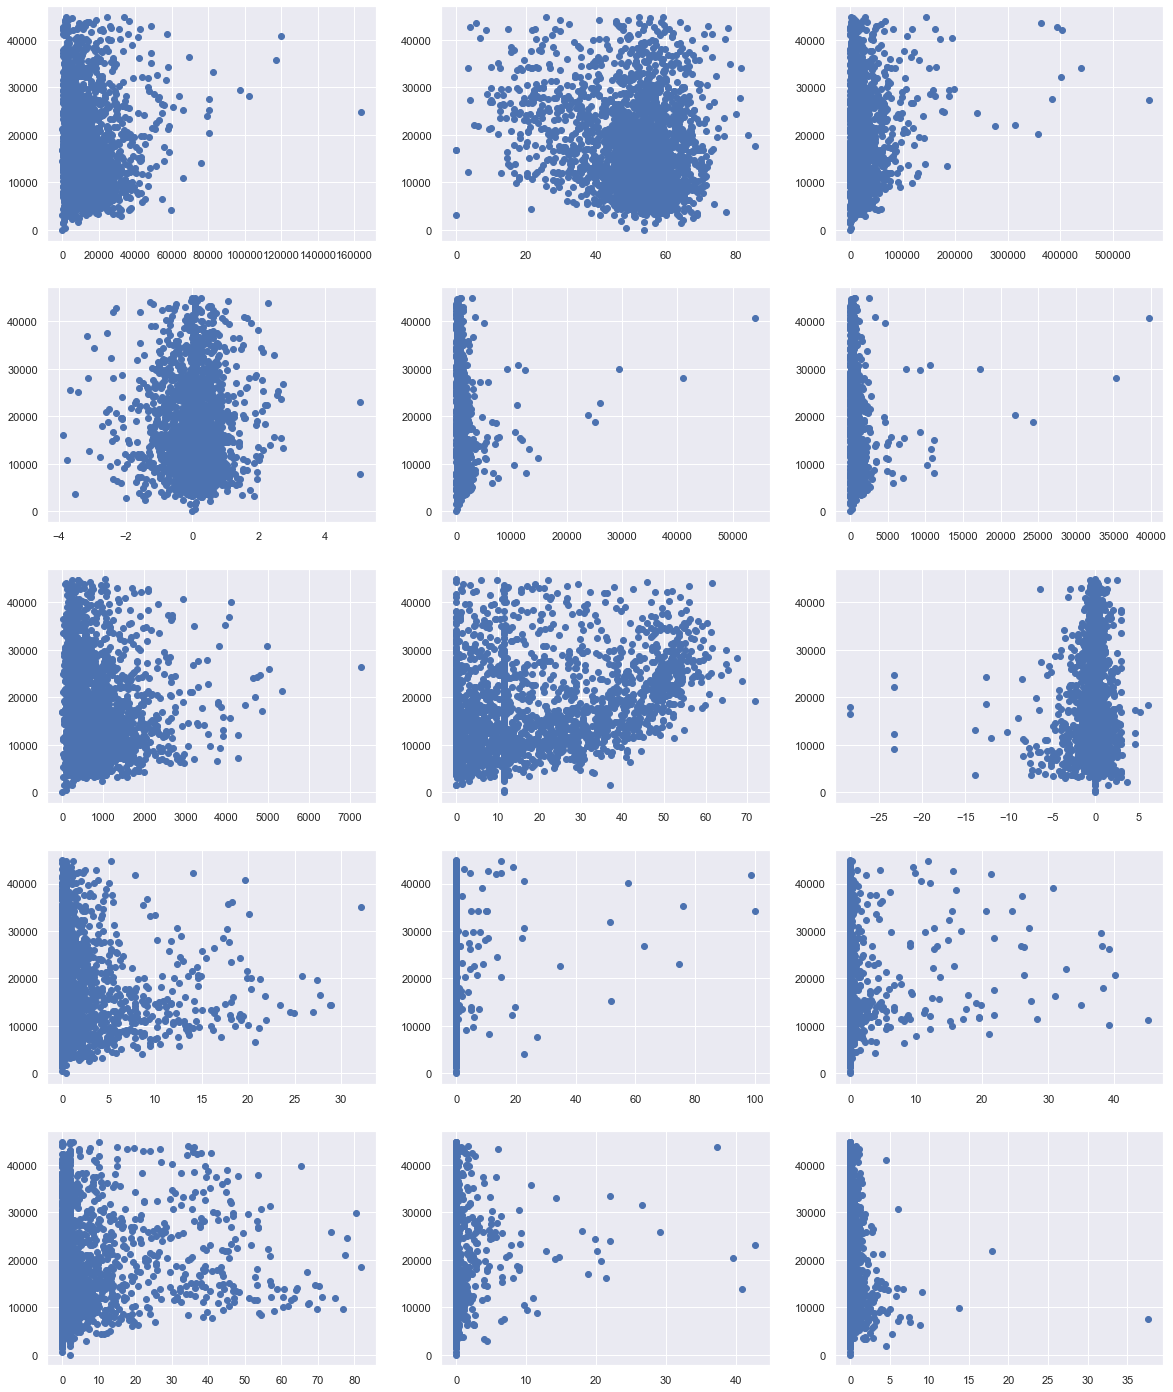

In [479]:
plt.figure(figsize=(20,25))
for i in range(98,113):
    plt.subplot(5, 3, i-97)
    plt.scatter(Inputs[Inputs.columns[i]],target)
plt.show()

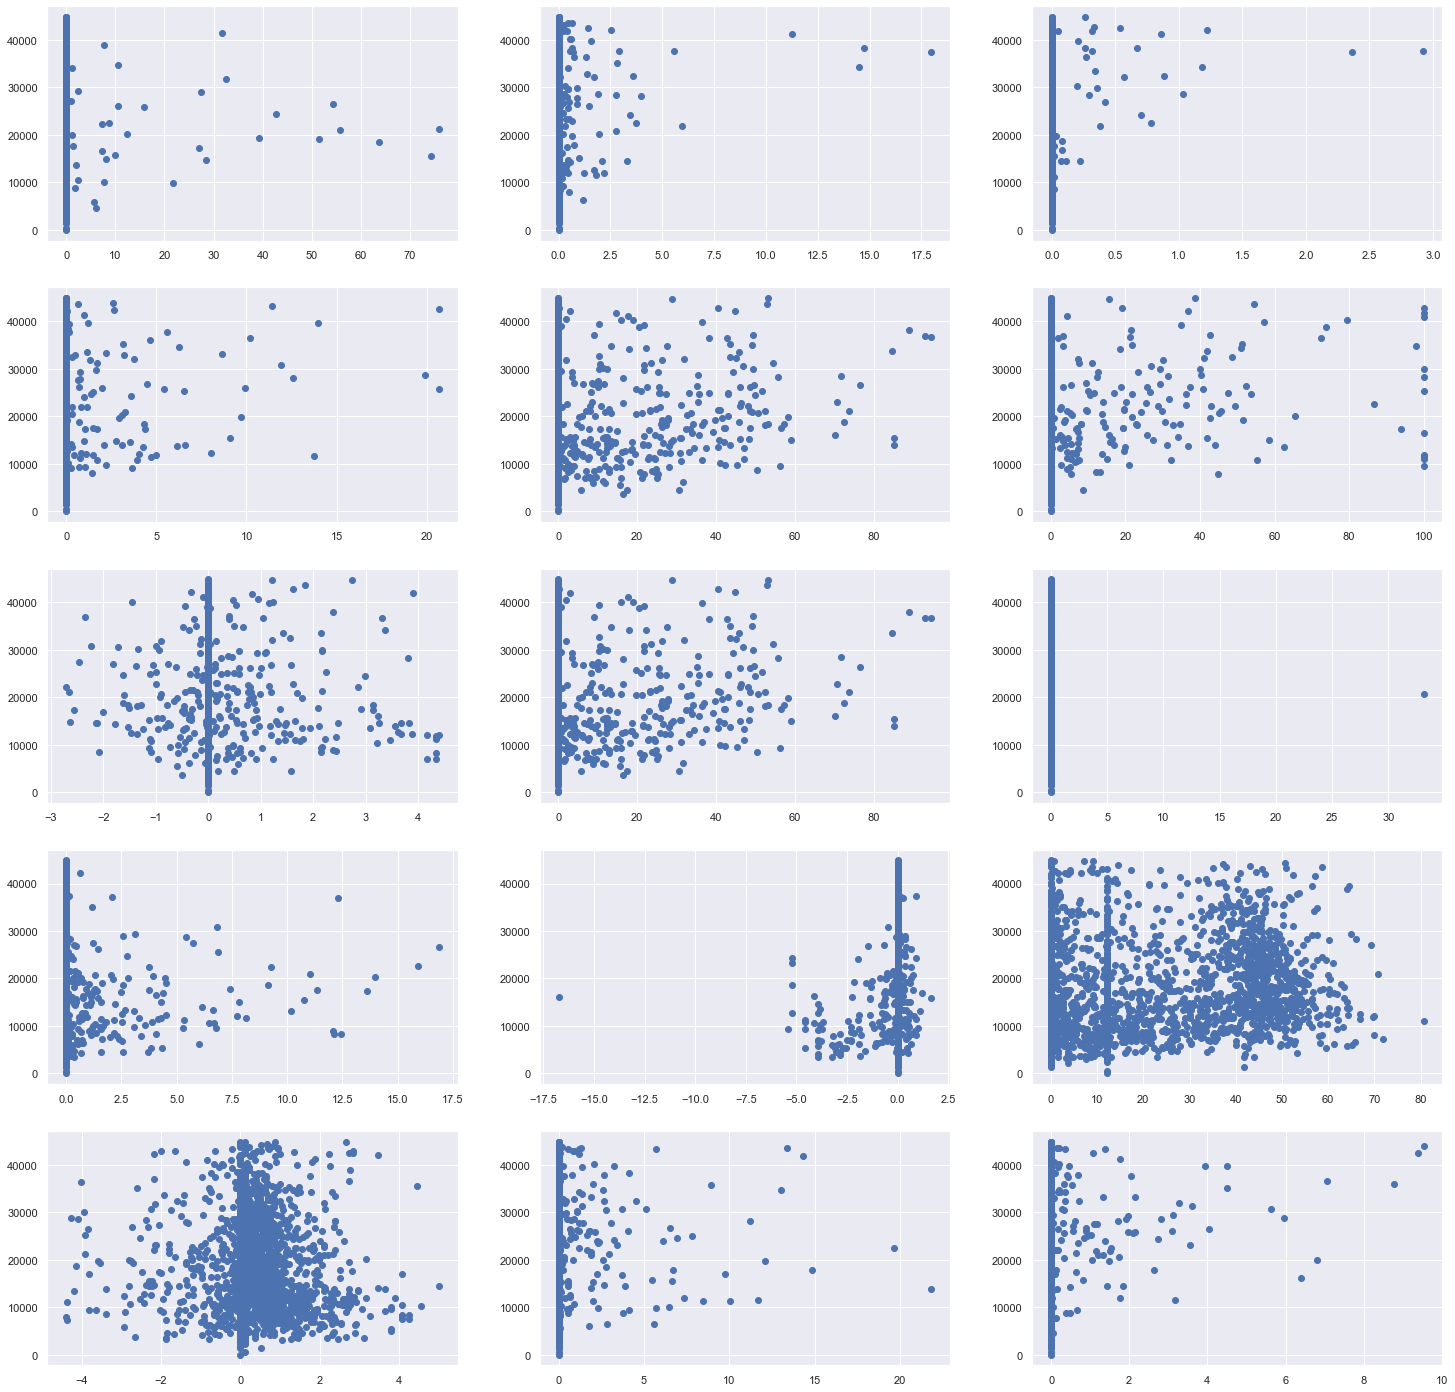

In [45]:
plt.figure(figsize=(25,25))
for i in range(113,128):
    plt.subplot(5, 3, i-112)
    plt.scatter(Inputs[Inputs.columns[i]],target)
plt.show()

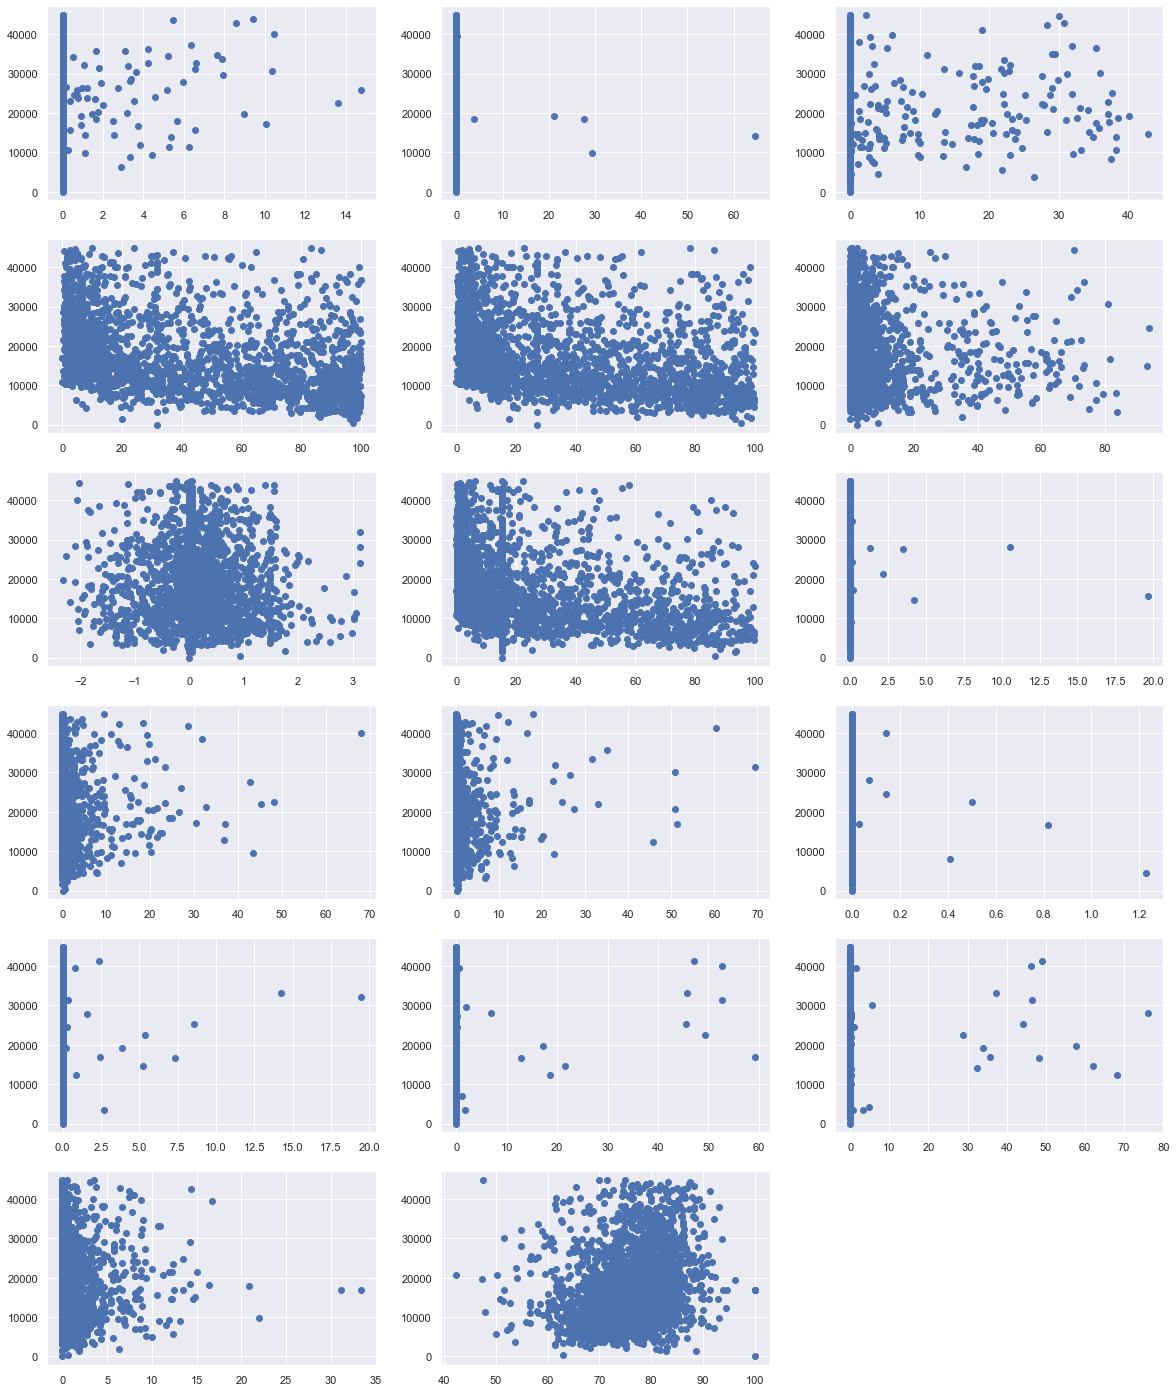

In [15]:
plt.figure(figsize=(20,25))
for i in range(128,145):
    plt.subplot(6, 3, i-127)
    plt.scatter(Inputs[Inputs.columns[i]],target)
plt.show()

In [42]:
len(Inputs.columns)

145

# Scaled data

In [43]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(Inputs)
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(Inputs)
inputs_scaled

array([[-0.74949049, -0.08890279, -0.25953711, ..., -0.07824372,
        -0.42285565,  0.14370148],
       [ 0.62140438, -1.04033564, -0.36942233, ..., -0.04241697,
         0.6929293 ,  0.33206504],
       [-0.37984368, -0.83645718, -0.25727144, ..., -0.07824372,
        -0.45312888, -2.14781908],
       ...,
       [-0.65635113,  1.61008445,  1.24147225, ..., -0.07824372,
        -0.53962384,  0.72012229],
       [-1.11331609,  1.17967435,  0.8506434 , ..., -0.07824372,
        -0.53962384,  2.16046618],
       [-1.11040548, -0.08890279,  5.02288301, ..., -0.07824372,
        -0.18931927,  0.73145243]])

# Train test split

In [125]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

#check the shape of the results
print("Training set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Test set- Features: ", x_test.shape, "Target: ",y_test.shape)



Training set - Features:  (1791, 145) Target:  (1791,)
Test set- Features:  (448, 145) Target:  (448,)


# Feature Selection

In [126]:
feature_columns=Inputs.columns

In [127]:
x_train =pd.DataFrame(data=x_train, columns=feature_columns)
x_test =pd.DataFrame(data=x_test, columns=feature_columns)

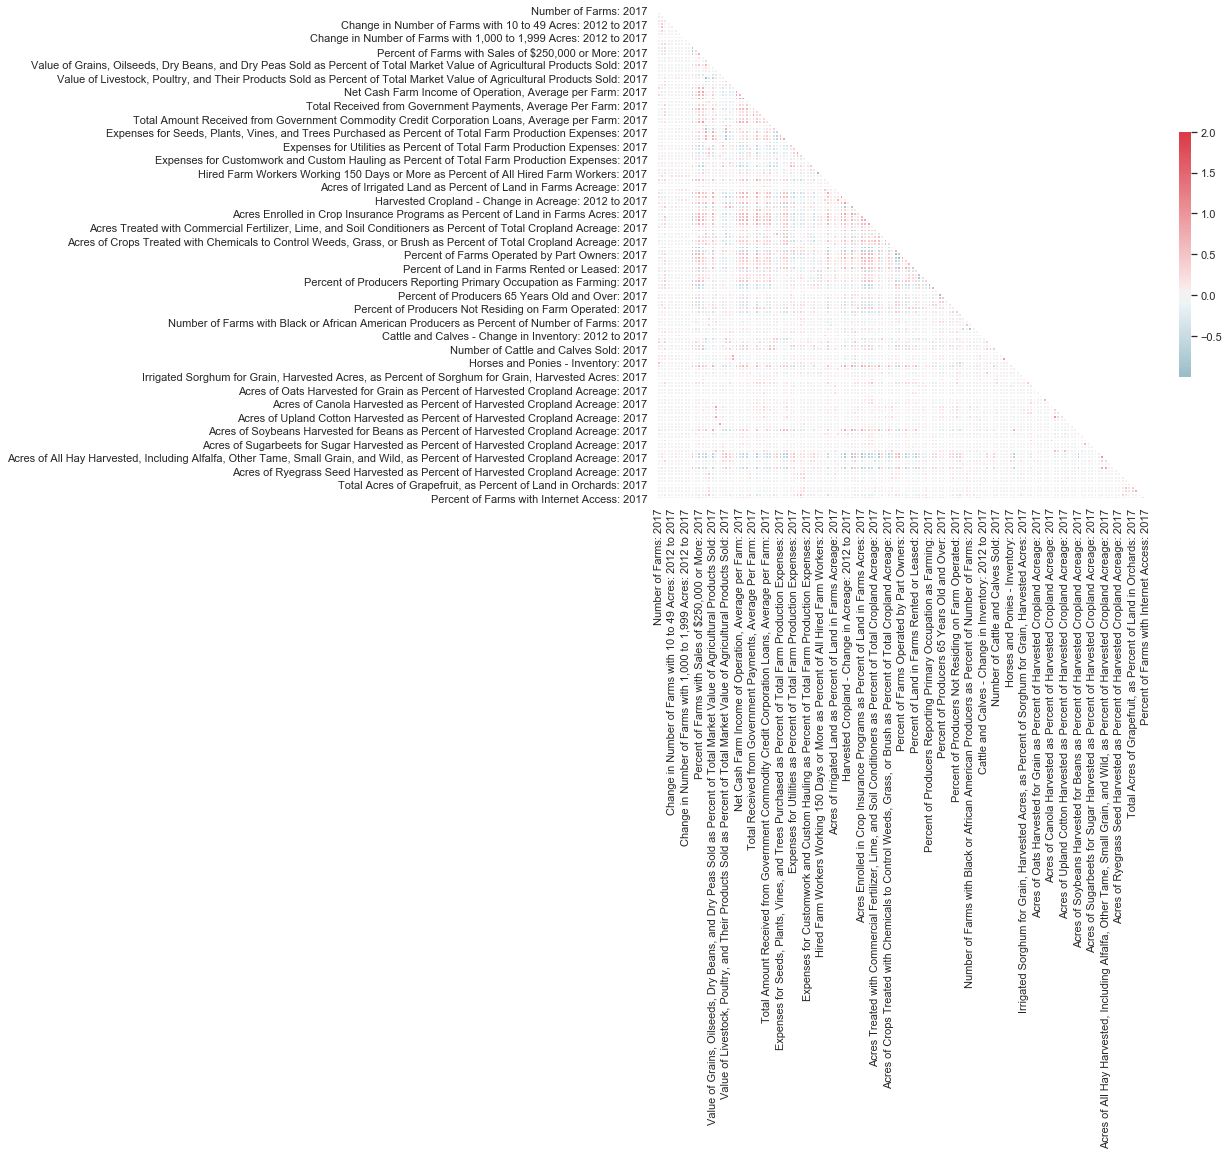

In [128]:

sns.set(style="white")


# Compute the correlation matrix
corr = x_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=2, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [129]:
# Create correlation matrix
corr_matrix = x_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x_train.drop(columns=to_drop, inplace=True)
x_test.drop(columns=to_drop, inplace=True)

len(x_train.columns)

136

In [130]:
x_train.columns

Index(['Number of Farms: 2017', 'Change in Number of Farms: 2012 to 2017',
       'Average Size of Farms in Acres: 2017',
       'Change in Number of Farms with Less Than 10 Acres: 2012 to 2017',
       'Change in Number of Farms with 10 to 49 Acres: 2012 to 2017',
       'Change in Number of Farms with 50 to 179 Acres: 2012 to 2017',
       'Change in Number of Farms with 180 to 499 Acres: 2012 to 2017',
       'Change in Number of Farms with 500 to 999 Acres: 2012 to 2017',
       'Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017',
       'Change in Number of Farms with 2,000 Acres or More: 2012 to 2017',
       ...
       'Acres of Other Dry Hay Harvested as Percent of Harvested Cropland Acreage: 2017',
       'Acres of Ryegrass Seed Harvested as Percent of Harvested Cropland Acreage: 2017',
       'Vegetables, Harvested Acres, as Percent of Harvested Cropland Acreage: 2017',
       'Acres of Land in Orchards as Percent of Cropland Acreage: 2017',
       'Total Acre

# Create my own function

In [131]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(abs(cross_val_score(model, x_train, y_train, scoring = scorer, cv = 10)))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(abs(cross_val_score(model, x_test, y_test, scoring = scorer, cv = 10)))
    return(rmse)

# Linear Regression

## RMSE

In [132]:
reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Score

In [133]:
test_accuracy = reg.score(x_test, y_test)
train_accuracy=reg.score(x_train, y_train)
print("Linear Regression Train Accuracy: {:2f}%".format(train_accuracy*100))
print("Linear Regression test Accuracy: {:2f}%".format(test_accuracy*100 ))

Linear Regression Train Accuracy: 62.106711%
Linear Regression test Accuracy: 56.482147%


## Residual

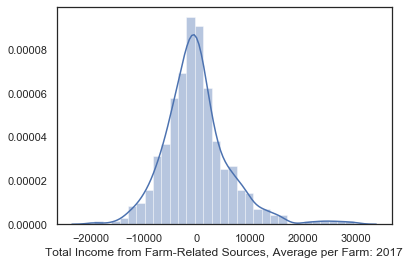

In [134]:
y_test_reg_pred=reg.predict(x_test)
# distribution of residual is 
sns.distplot(y_test-y_test_reg_pred)

In [135]:
lr_rmse=np.sqrt(sum((y_test-y_test_reg_pred)**2))

# Ridge regression

## Given a list of alphas 

In [136]:
# given a list of alphas 
alphas=[3,2, 1.6,1.5, 1.49,1.48,1.47,
        1.46,1.47,1.4,1.3,1.2
        ,1.1, 1.05, 1.01,1.0, 0.5, 
        0.1, 0.05, 0.01, 0.005,
        0.001, 0.0005, 0.0001]

## Obtain optimal lapha

In [137]:
#Gride search to get optimal alpha which is 0.05
model1 = RidgeCV(alphas=alphas, normalize=False)
model1.fit(inputs_scaled, target) 
print('The optimal alpha for Ridge model: '+str(model1.alpha_))

The optimal alpha for Ridge model: 1.5


## RMSE

In [138]:
model_ridge = Ridge(alpha=model1.alpha_ ,normalize=False)
model_ridge.fit(x_train, y_train)



Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## Score

In [139]:
train_score_ridge = model_ridge.score(x_train, y_train)  
test_score_ridge = model_ridge.score(x_test, y_test)  
print("Ridge Regression train Accuracy: {:2f}%".format(train_score_ridge * 100))
print("Ridge Regression test Accuracy: {:2f}%".format(test_score_ridge* 100))


Ridge Regression train Accuracy: 62.105473%
Ridge Regression test Accuracy: 56.541959%


## Distribution of Residual

In [140]:
y_test_predict_ridge=model_ridge.predict(x_test)

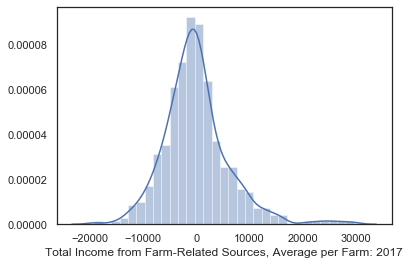

In [141]:
# distribution of residual
sns.distplot(y_test-y_test_predict_ridge)

In [142]:
ridge_rmse=np.sqrt(sum((y_test-y_test_predict_ridge)**2))
ridge_rmse

130578.0738498606

# Lasso

## Find optimal alpha 

In [143]:
# Find the optimal alpha value for Lasso regression
modelasso = LassoCV(alphas=alphas,cv=10,normalize=False)
modelasso.fit(inputs_scaled, target) 



/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24806573763.282467, tolerance: 18186908.471745208
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22385363331.819603, tolerance: 18186908.471745208
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20607002994.327484, tolerance: 18186908.471745208
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_de

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485648011.1688309, tolerance: 18540622.349935286
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205085740.07309723, tolerance: 18540622.349935286
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8960951487.053757, tolerance: 18540622.349935286
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desc

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1404755917.613533, tolerance: 18543803.62443246
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415203714.7696686, tolerance: 18543803.62443246
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144449217.3474884, tolerance: 18543803.62443246
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26655270843.777637, tolerance: 18342088.922710374
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27038055693.972366, tolerance: 18342088.922710374
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27380915849.357304, tolerance: 18342088.922710374
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_de

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988202972.0297852, tolerance: 17955777.90362114
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 690804878.9104462, tolerance: 17955777.90362114
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 484439141.7167053, tolerance: 17955777.90362114
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15864797759.257492, tolerance: 18259636.03979534
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9798049118.883263, tolerance: 18259636.03979534
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4781639682.197487, tolerance: 18259636.03979534
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent

/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22085098352.772213, tolerance: 18581753.27663884
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24573537976.501167, tolerance: 18581753.27663884
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24696888434.814735, tolerance: 18581753.27663884
  tol, rng, random, positive)
/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_desce

LassoCV(alphas=[3, 2, 1.6, 1.5, 1.49, 1.48, 1.47, 1.46, 1.47, 1.4, 1.3, 1.2,
                1.1, 1.05, 1.01, 1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001,
                0.0005, 0.0001],
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [144]:
# use the best alpha and fit it into model 
model_lasso = Lasso(alpha=modelasso.alpha_ ,normalize=False)
model_lasso.fit(x_train, y_train)

Lasso(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
train_score_lasso = model_lasso.score(x_train, y_train)  
test_score_lasso = model_lasso.score(x_test, y_test) 
print("Lasso Regression test score: {:2f}%".format(test_score_lasso* 100))
print("Lasso Regression train score: {:2f}%".format(train_score_lasso * 100))

Lasso Regression test score: 56.640245%
Lasso Regression train score: 62.092972%


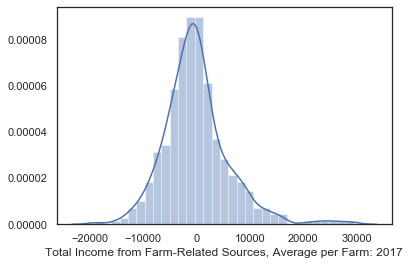

In [146]:
# to get y_test_predict
y_test_predict_lasso=model_lasso.predict(x_test)
# distribution of residual
sns.distplot(y_test-y_test_predict_lasso)

In [147]:
lasso_rmse=np.sqrt(sum((y_test-y_test_predict_lasso)**2))
lasso_rmse

130430.3313536297

# Compare models' RMSE

In [148]:
lr_rmse,ridge_rmse,lasso_rmse

(130667.90118617419, 130578.0738498606, 130430.3313536297)

In [149]:
min(lr_rmse,ridge_rmse,lasso_rmse)

130430.3313536297

 Lasso's RMSE is the smallest so we choose Lasso

# Parameters of each independent variables

In [156]:
feature=pd.DataFrame()
feature['feature']=list(x_train.columns)
feature['weight']=list(model_lasso.coef_)
Feature=feature.sort_values(by='weight', ascending=False)
for f in range(len(feature)):
    print('{} : {}'.format(feature.feature[f], feature.weight[f]))
    print('\n')

Number of Farms: 2017 : -2631.373382610574


Change in Number of Farms: 2012 to 2017 : 35.713273220641405


Average Size of Farms in Acres: 2017 : -0.0


Change in Number of Farms with Less Than 10 Acres: 2012 to 2017 : 163.4137955239525


Change in Number of Farms with 10 to 49 Acres: 2012 to 2017 : -192.39440285129334


Change in Number of Farms with 50 to 179 Acres: 2012 to 2017 : -67.5145871978841


Change in Number of Farms with 180 to 499 Acres: 2012 to 2017 : 2.648144601515375


Change in Number of Farms with 500 to 999 Acres: 2012 to 2017 : 10.36177403011502


Change in Number of Farms with 1,000 to 1,999 Acres: 2012 to 2017 : 234.99873343898852


Change in Number of Farms with 2,000 Acres or More: 2012 to 2017 : 8.20389653080735


Percent of Farms with Sales of Less Than $10,000: 2017 : 773.2776519864827


Percent of Farms with Sales of $10,000 to $249,999: 2017 : -288.00775222277383


Percent of Farms with Sales of $250,000 or More: 2017 : -0.0


Average Value of Agricultural

# Top 5 independent variables 

## which positively affect  average of total income of farm 

In [ ]:
Feature.head()

##  which negatively affect average of total income of farm 


In [ ]:
Feature.tail()